In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files = files.upload()

Saving classification_parameters.csv to classification_parameters.csv
Saving Innovisors_DSEATS_Africa_2025_Classification.csv to Innovisors_DSEATS_Africa_2025_Classification.csv
Saving reservoir_info.csv to reservoir_info.csv
Saving spe_africa_dseats_datathon_2025_wells_dataset.csv to spe_africa_dseats_datathon_2025_wells_dataset.csv


In [3]:
# reading the csv files

Well_data = pd.read_csv("spe_africa_dseats_datathon_2025_wells_dataset.csv")
reservoir_data = pd.read_csv("reservoir_info.csv")
classification_param = pd.read_csv("classification_parameters.csv")
samplesub = pd.read_csv("Innovisors_DSEATS_Africa_2025_Classification.csv")

In [4]:
print(Well_data.info())
print(Well_data.shape)
Well_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7955 entries, 0 to 7954
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   PROD_DATE                             7955 non-null   object 
 1   WELL_NAME                             7955 non-null   object 
 2   ON_STREAM_HRS                         7955 non-null   float64
 3   BOTTOMHOLE_FLOWING_PRESSURE (PSI)     7955 non-null   object 
 4   DOWNHOLE_TEMPERATURE (deg F)          7955 non-null   float64
 5   ANNULUS_PRESS (PSI)                   7955 non-null   object 
 6   CHOKE_SIZE (%)                        7955 non-null   float64
 7   WELL_HEAD_PRESSURE (PSI)              7955 non-null   object 
 8   WELL_HEAD_TEMPERATURE (deg F)         7955 non-null   float64
 9   CUMULATIVE_OIL_PROD (STB)             7955 non-null   object 
 10  CUMULATIVE_FORMATION_GAS_PROD (MSCF)  7955 non-null   object 
 11  CUMULATIVE_TOTAL_

,PROD_DATE,WELL_NAME,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),CUMULATIVE_FORMATION_GAS_PROD (MSCF),CUMULATIVE_TOTAL_GAS_PROD (MSCF),CUMULATIVE_WATER_PROD (BBL)
0,15-Feb-14,Well_#1,0.0,"4,050",189.866,0,1.17951,482.46,50.864,0,0,0,0
1,16-Feb-14,Well_#1,0.0,"3,961",189.945,0,2.99440,328.601,47.668,0,0,0,0
2,17-Feb-14,Well_#1,0.0,"3,961",190.004,0,1.90349,387.218,48.962,0,0,0,0
3,18-Feb-14,Well_#1,0.0,"3,964",190.020,0,0.00000,308.98,46.636,0,0,0,0
4,19-Feb-14,Well_#1,0.0,"3,965",190.107,0,30.20760,196.057,47.297,0,0,0,0


##Convert String numerical features to Float datatype(Welldata)

In [5]:
for col in Well_data.drop(columns=["PROD_DATE","WELL_NAME",]).select_dtypes(include=object):
    Well_data[col] = Well_data[col].str.replace(',', '').astype(float)
Well_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7955 entries, 0 to 7954
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   PROD_DATE                             7955 non-null   object 
 1   WELL_NAME                             7955 non-null   object 
 2   ON_STREAM_HRS                         7955 non-null   float64
 3   BOTTOMHOLE_FLOWING_PRESSURE (PSI)     7955 non-null   float64
 4   DOWNHOLE_TEMPERATURE (deg F)          7955 non-null   float64
 5   ANNULUS_PRESS (PSI)                   7955 non-null   float64
 6   CHOKE_SIZE (%)                        7955 non-null   float64
 7   WELL_HEAD_PRESSURE (PSI)              7955 non-null   float64
 8   WELL_HEAD_TEMPERATURE (deg F)         7955 non-null   float64
 9   CUMULATIVE_OIL_PROD (STB)             7955 non-null   float64
 10  CUMULATIVE_FORMATION_GAS_PROD (MSCF)  7955 non-null   float64
 11  CUMULATIVE_TOTAL_

In [6]:
#Convert Prod. Date to Date time
Well_data['PROD_DATE'] = pd.to_datetime(Well_data['PROD_DATE'])
Well_data.info()

/tmp/ipython-input-6-2071063844.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Well_data['PROD_DATE'] = pd.to_datetime(Well_data['PROD_DATE'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7955 entries, 0 to 7954
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   PROD_DATE                             7955 non-null   datetime64[ns]
 1   WELL_NAME                             7955 non-null   object        
 2   ON_STREAM_HRS                         7955 non-null   float64       
 3   BOTTOMHOLE_FLOWING_PRESSURE (PSI)     7955 non-null   float64       
 4   DOWNHOLE_TEMPERATURE (deg F)          7955 non-null   float64       
 5   ANNULUS_PRESS (PSI)                   7955 non-null   float64       
 6   CHOKE_SIZE (%)                        7955 non-null   float64       
 7   WELL_HEAD_PRESSURE (PSI)              7955 non-null   float64       
 8   WELL_HEAD_TEMPERATURE (deg F)         7955 non-null   float64       
 9   CUMULATIVE_OIL_PROD (STB)             7955 non-null   float64       
 10  

In [7]:
print(Well_data.shape)
Well_data.head()

(7955, 13)


,PROD_DATE,WELL_NAME,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),CUMULATIVE_FORMATION_GAS_PROD (MSCF),CUMULATIVE_TOTAL_GAS_PROD (MSCF),CUMULATIVE_WATER_PROD (BBL)
0,2014-02-15,Well_#1,0.0,4050.0,189.866,0.0,1.17951,482.460,50.864,0.0,0.0,0.0,0.0
1,2014-02-16,Well_#1,0.0,3961.0,189.945,0.0,2.99440,328.601,47.668,0.0,0.0,0.0,0.0
2,2014-02-17,Well_#1,0.0,3961.0,190.004,0.0,1.90349,387.218,48.962,0.0,0.0,0.0,0.0
3,2014-02-18,Well_#1,0.0,3964.0,190.020,0.0,0.00000,308.980,46.636,0.0,0.0,0.0,0.0
4,2014-02-19,Well_#1,0.0,3965.0,190.107,0.0,30.20760,196.057,47.297,0.0,0.0,0.0,0.0


In [8]:
print(reservoir_data.shape)
print(reservoir_data.info())
reservoir_data.head()

(5, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Reservoir Name                            5 non-null      object 
 1   Initial Reservoir Pressure (PSI)          5 non-null      object 
 2   Bubble Point Pressure (PSI)               5 non-null      object 
 3   Current Average Reservoir Pressure (PSI)  5 non-null      object 
 4   Solution Gas-Oil-Ratio (SCF/BBL)          5 non-null      object 
 5   Formation Volume Factor (RB/STB)          5 non-null      float64
dtypes: float64(1), object(5)
memory usage: 372.0+ bytes
None


,Reservoir Name,Initial Reservoir Pressure (PSI),Bubble Point Pressure (PSI),Current Average Reservoir Pressure (PSI),Solution Gas-Oil-Ratio (SCF/BBL),Formation Volume Factor (RB/STB)
0,ACHI,"3,500","3,300","2,700",800,1.20
1,KEMA,"4,200","4,000","3,900",600,1.45
2,MAKO,"3,500","3,500","3,000",500,1.15
3,DEPU,"2,800","2,800","2,400","1,200",1.37
4,JANI,"4,500","4,300","4,200","1,000",1.30


##Convert String numerical features to Float datatype(Reservoir Data)

In [9]:
for col in reservoir_data.drop(columns="Reservoir Name").select_dtypes(include=object):
    reservoir_data[col] = reservoir_data[col].str.replace(',', '').astype(float)
reservoir_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Reservoir Name                            5 non-null      object 
 1   Initial Reservoir Pressure (PSI)          5 non-null      float64
 2   Bubble Point Pressure (PSI)               5 non-null      float64
 3   Current Average Reservoir Pressure (PSI)  5 non-null      float64
 4   Solution Gas-Oil-Ratio (SCF/BBL)          5 non-null      float64
 5   Formation Volume Factor (RB/STB)          5 non-null      float64
dtypes: float64(5), object(1)
memory usage: 372.0+ bytes


In [10]:
print(classification_param.shape)
print(classification_param.info())
classification_param.head()

(5, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Reservoir Name                5 non-null      object
 1   Reservoir Type                2 non-null      object
 2   Well Type                     2 non-null      object
 3   Production Type               2 non-null      object
 4   Formation GOR Trend           3 non-null      object
 5   Watercut Trend                4 non-null      object
 6   Oil Productivity Index Trend  4 non-null      object
dtypes: object(7)
memory usage: 412.0+ bytes
None


,Reservoir Name,Reservoir Type,Well Type,Production Type,Formation GOR Trend,Watercut Trend,Oil Productivity Index Trend
0,ACHI,Saturated,NF,Steady,aSolGOR,Flat,Flat
1,KEMA,Undersat,GL,Unsteady,bSolGOR,Incr,Incr
2,MAKO,NaN,NaN,NaN,Combo,Decr,Decr
3,DEPU,NaN,NaN,NaN,NaN,Combo,Combo
4,JANI,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
samplesub.head()

,Well,Reservoir Name,Reservoir Type,Well Type,Production Type,Formation GOR Trend,Watercut Trend,Oil Productivity Index
0,1,KEMA,Saturated,GL,Unsteady,aSolGOR,Flat,Decr
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Identify the reservoir each well is producing

In [12]:
Max_bhp_perwell = Well_data.groupby('WELL_NAME')['BOTTOMHOLE_FLOWING_PRESSURE (PSI)'].max().reset_index()
Max_bhp_perwell = Max_bhp_perwell.rename(columns={'BOTTOMHOLE_FLOWING_PRESSURE (PSI)': 'Max_BHFP'})
Max_bhp_perwell

,WELL_NAME,Max_BHFP
0,Well_#1,4096.0
1,Well_#10,4051.0
2,Well_#11,2521.0
3,Well_#12,2557.0
4,Well_#13,2246.0
5,Well_#14,2857.0
6,Well_#15,4032.0
7,Well_#16,3836.0
8,Well_#17,2304.0
9,Well_#18,2621.0


In [13]:
val = ((abs(Max_bhp_perwell['Max_BHFP'] - reservoir_data['Current Average Reservoir Pressure (PSI)'][0])))
val

,Max_BHFP
0,1396.0
1,1351.0
2,179.0
3,143.0
4,454.0
5,157.0
6,1332.0
7,1136.0
8,396.0
9,79.0


In [14]:
mint = (((abs(Max_bhp_perwell['Max_BHFP'] - reservoir_data['Current Average Reservoir Pressure (PSI)'][0]))) <= 200)
Max_bhp_perwell[mint]

,WELL_NAME,Max_BHFP
2,Well_#11,2521.0
3,Well_#12,2557.0
5,Well_#14,2857.0
9,Well_#18,2621.0
12,Well_#20,2858.0
18,Well_#8,2681.0


In [15]:
# Initialize the 'Reservoir Name' column in Max_bhp_perwell
Max_bhp_perwell["Reservoir Name"] = ""

# Iterate through each well in Max_bhp_perwell
for index, row in Max_bhp_perwell.iterrows():
    well_max_bhfp = row['Max_BHFP']

    # Calculate the absolute difference between the well's Max_BHFP and each reservoir's Current Average Reservoir Pressure (PSI)
    pressure_diff = abs(well_max_bhfp - reservoir_data['Current Average Reservoir Pressure (PSI)'])

    # Find the index of the reservoir with the minimum pressure difference
    min_diff_index = pressure_diff.idxmin()

    # Assign the Reservoir Name from reservoir_data based on the index of the minimum difference
    Max_bhp_perwell.loc[index, "Reservoir Name"] = reservoir_data.loc[min_diff_index, 'Reservoir Name']

# Display the updated Max_bhp_perwell DataFrame
display(Max_bhp_perwell)

,WELL_NAME,Max_BHFP,Reservoir Name
0,Well_#1,4096.0,JANI
1,Well_#10,4051.0,JANI
2,Well_#11,2521.0,DEPU
3,Well_#12,2557.0,ACHI
4,Well_#13,2246.0,DEPU
5,Well_#14,2857.0,MAKO
6,Well_#15,4032.0,KEMA
7,Well_#16,3836.0,KEMA
8,Well_#17,2304.0,DEPU
9,Well_#18,2621.0,ACHI


In [16]:
Merge_data = pd.merge(Max_bhp_perwell, reservoir_data, on="Reservoir Name", how="left")
Merge_data

,WELL_NAME,Max_BHFP,Reservoir Name,Initial Reservoir Pressure (PSI),Bubble Point Pressure (PSI),Current Average Reservoir Pressure (PSI),Solution Gas-Oil-Ratio (SCF/BBL),Formation Volume Factor (RB/STB)
0,Well_#1,4096.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30
1,Well_#10,4051.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30
2,Well_#11,2521.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37
3,Well_#12,2557.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20
4,Well_#13,2246.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37
5,Well_#14,2857.0,MAKO,3500.0,3500.0,3000.0,500.0,1.15
6,Well_#15,4032.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45
7,Well_#16,3836.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45
8,Well_#17,2304.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37
9,Well_#18,2621.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20


In [17]:
#Calculate Pressure difference to see if it is within 200psi
Merge_data['Pressure Difference'] = abs(Merge_data['Max_BHFP'] - Merge_data['Current Average Reservoir Pressure (PSI)'])
Merge_data

,WELL_NAME,Max_BHFP,Reservoir Name,Initial Reservoir Pressure (PSI),Bubble Point Pressure (PSI),Current Average Reservoir Pressure (PSI),Solution Gas-Oil-Ratio (SCF/BBL),Formation Volume Factor (RB/STB),Pressure Difference
0,Well_#1,4096.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30,104.0
1,Well_#10,4051.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30,149.0
2,Well_#11,2521.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,121.0
3,Well_#12,2557.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20,143.0
4,Well_#13,2246.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,154.0
5,Well_#14,2857.0,MAKO,3500.0,3500.0,3000.0,500.0,1.15,143.0
6,Well_#15,4032.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45,132.0
7,Well_#16,3836.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45,64.0
8,Well_#17,2304.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,96.0
9,Well_#18,2621.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20,79.0


## Determine for each reservoir whether saturated or undersaturated using the initial condition

If Initial Pressure <= Bubble Point Pressure(saturated)

If Initial Pressure > Bubble Point Pressure(undersaturated)

In [18]:
classification_param['Reservoir Type'][0]

'Saturated'

In [19]:
reservoir_data["Reservoir Type"] = ""
for i in range(len(reservoir_data)):
  if reservoir_data["Initial Reservoir Pressure (PSI)"][i] <= reservoir_data["Bubble Point Pressure (PSI)"][i]:
    reservoir_data.loc[i,"Reservoir Type"] = classification_param['Reservoir Type'][0]
  else:
    reservoir_data.loc[i,"Reservoir Type"] = classification_param['Reservoir Type'][1]

reservoir_data

,Reservoir Name,Initial Reservoir Pressure (PSI),Bubble Point Pressure (PSI),Current Average Reservoir Pressure (PSI),Solution Gas-Oil-Ratio (SCF/BBL),Formation Volume Factor (RB/STB),Reservoir Type
0,ACHI,3500.0,3300.0,2700.0,800.0,1.20,Undersat
1,KEMA,4200.0,4000.0,3900.0,600.0,1.45,Undersat
2,MAKO,3500.0,3500.0,3000.0,500.0,1.15,Saturated
3,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,Saturated
4,JANI,4500.0,4300.0,4200.0,1000.0,1.30,Undersat


##Merge Reservoir Type and Name

In [20]:
Merge_data['Reservoir Type'] = pd.merge(Merge_data, reservoir_data[['Reservoir Name','Reservoir Type']], on="Reservoir Name", how="left")['Reservoir Type']
Merge_data

,WELL_NAME,Max_BHFP,Reservoir Name,Initial Reservoir Pressure (PSI),Bubble Point Pressure (PSI),Current Average Reservoir Pressure (PSI),Solution Gas-Oil-Ratio (SCF/BBL),Formation Volume Factor (RB/STB),Pressure Difference,Reservoir Type
0,Well_#1,4096.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30,104.0,Undersat
1,Well_#10,4051.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30,149.0,Undersat
2,Well_#11,2521.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,121.0,Saturated
3,Well_#12,2557.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20,143.0,Undersat
4,Well_#13,2246.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,154.0,Saturated
5,Well_#14,2857.0,MAKO,3500.0,3500.0,3000.0,500.0,1.15,143.0,Saturated
6,Well_#15,4032.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45,132.0,Undersat
7,Well_#16,3836.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45,64.0,Undersat
8,Well_#17,2304.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,96.0,Saturated
9,Well_#18,2621.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20,79.0,Undersat


##Identify whether the well is naturally flowing or gas lifted

In [21]:
Well_data.head()

,PROD_DATE,WELL_NAME,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),CUMULATIVE_FORMATION_GAS_PROD (MSCF),CUMULATIVE_TOTAL_GAS_PROD (MSCF),CUMULATIVE_WATER_PROD (BBL)
0,2014-02-15,Well_#1,0.0,4050.0,189.866,0.0,1.17951,482.460,50.864,0.0,0.0,0.0,0.0
1,2014-02-16,Well_#1,0.0,3961.0,189.945,0.0,2.99440,328.601,47.668,0.0,0.0,0.0,0.0
2,2014-02-17,Well_#1,0.0,3961.0,190.004,0.0,1.90349,387.218,48.962,0.0,0.0,0.0,0.0
3,2014-02-18,Well_#1,0.0,3964.0,190.020,0.0,0.00000,308.980,46.636,0.0,0.0,0.0,0.0
4,2014-02-19,Well_#1,0.0,3965.0,190.107,0.0,30.20760,196.057,47.297,0.0,0.0,0.0,0.0


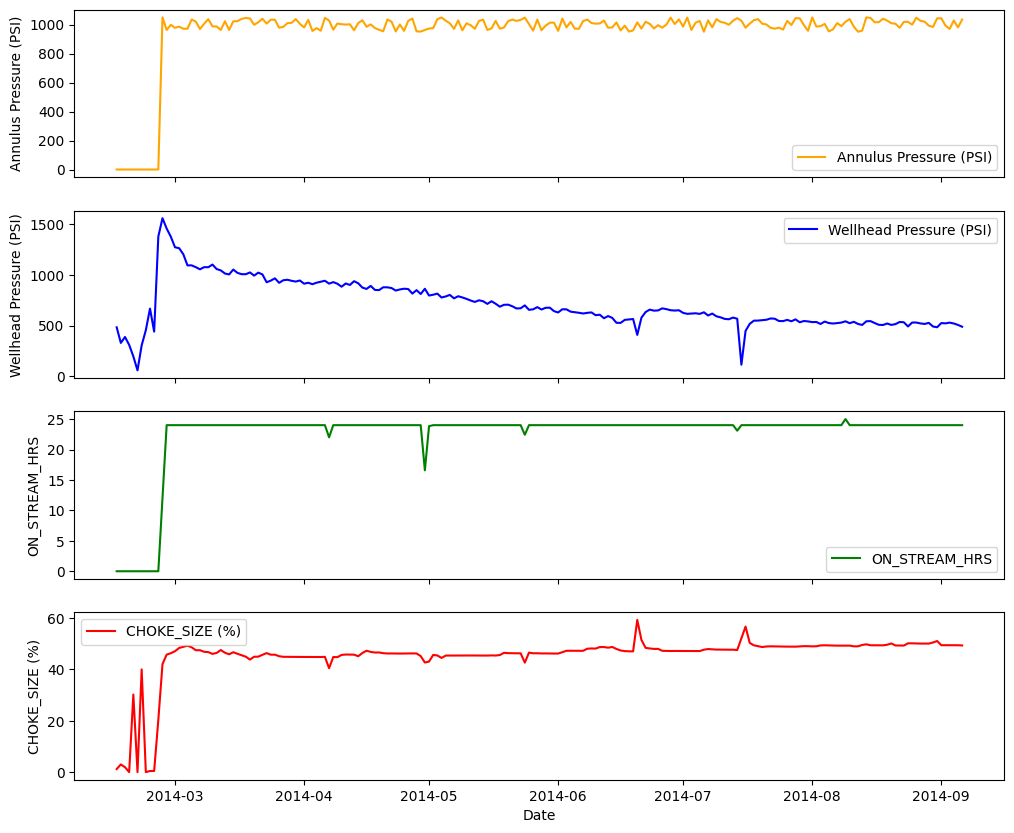

In [22]:
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
Well = "Well_#1"
mask = Well_data["WELL_NAME"] == Well
Well_data_mask = Well_data[mask]


# ANNULUS PRESSURE
axs[0].plot(Well_data_mask['PROD_DATE'], Well_data_mask['ANNULUS_PRESS (PSI)'], label='Annulus Pressure (PSI)', color='orange')
axs[0].set_ylabel('Annulus Pressure (PSI)')
axs[0].legend()

# WELLHEAD PRESSURE
axs[1].plot(Well_data_mask['PROD_DATE'], Well_data_mask['WELL_HEAD_PRESSURE (PSI)'], label='Wellhead Pressure (PSI)', color='blue')
axs[1].set_ylabel('Wellhead Pressure (PSI)')
axs[1].legend()


# ON_STREAM_HRS
axs[2].plot(Well_data_mask['PROD_DATE'], Well_data_mask['ON_STREAM_HRS'], label='ON_STREAM_HRS', color='green')
axs[2].set_ylabel('ON_STREAM_HRS')
axs[2].legend()

# ON_STREAM_HRS
axs[3].plot(Well_data_mask['PROD_DATE'], Well_data_mask['CHOKE_SIZE (%)'], label='CHOKE_SIZE (%)', color='red')
axs[3].set_ylabel('CHOKE_SIZE (%)')
axs[3].legend()

plt.xlabel('Date')
plt.show()
# plt.plot(Well_data.loc[mask,"ON_STREAM_HRS"])
# plt.plot(Well_data.loc[mask,"ANNULUS_PRESS (PSI)"])

In [23]:
#Aggregate well
Well_agg = Well_data.groupby("WELL_NAME").agg({
    'ON_STREAM_HRS': 'mean',
    'BOTTOMHOLE_FLOWING_PRESSURE (PSI)': 'mean',
    'DOWNHOLE_TEMPERATURE (deg F)': 'mean',
    'ANNULUS_PRESS (PSI)': 'mean',
    'CHOKE_SIZE (%)': 'max',
    'WELL_HEAD_PRESSURE (PSI)': 'max',
    'WELL_HEAD_TEMPERATURE (deg F)': 'max',
    'CUMULATIVE_OIL_PROD (STB)': 'last',
    'CUMULATIVE_FORMATION_GAS_PROD (MSCF)': 'last',
    'CUMULATIVE_TOTAL_GAS_PROD (MSCF)': 'last',
    'CUMULATIVE_WATER_PROD (BBL)': 'last',
}).reset_index()
Well_agg

,WELL_NAME,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),CUMULATIVE_FORMATION_GAS_PROD (MSCF),CUMULATIVE_TOTAL_GAS_PROD (MSCF),CUMULATIVE_WATER_PROD (BBL)
0,Well_#1,22.592745,2943.250000,207.562745,948.161863,59.25648,1557.760,127.378,101659.0,105445.0,145425.0,38698.0
1,Well_#10,21.116628,3995.653396,208.241824,1044.956934,100.00000,70.098,98.812,116279.0,147319.0,147319.0,17343.0
2,Well_#11,21.181085,2427.369501,143.126349,832.329994,100.00000,221.014,79.235,167307.0,188529.0,245087.0,70288.0
3,Well_#12,21.607069,1996.779507,149.177655,0.048952,69.79259,172.777,89.974,578776.0,392346.0,392346.0,324335.0
4,Well_#13,21.845344,1611.368421,106.349773,17.137304,13.13761,95.507,37.607,190635.0,264037.0,264037.0,38115.0
5,Well_#14,23.412337,2406.733696,148.926386,14.480489,13.37645,242.844,100.591,142421.0,60429.0,60429.0,5323.0
6,Well_#15,19.137584,3139.795107,204.021709,15.247370,43.01704,108.793,123.006,118382.0,123256.0,123256.0,115272.0
7,Well_#16,22.512483,2542.210884,202.295891,17.622276,14.51274,252.799,112.820,67679.0,63386.0,63386.0,24609.0
8,Well_#17,23.766835,1968.717890,156.742667,757.186851,100.00000,142.596,90.241,280021.0,263436.0,380519.0,315759.0
9,Well_#18,23.259231,2216.342949,154.258099,0.000000,76.69223,253.783,93.510,205968.0,182166.0,182166.0,180240.0


In [24]:
classification_param['Well Type'][0]

'NF'

In [25]:
# Using a Threshhold of 50psi
Well_agg['Well Type'] = np.where(Well_agg['ANNULUS_PRESS (PSI)'] <= 50, classification_param['Well Type'][0], classification_param['Well Type'][1])
Well_agg

,WELL_NAME,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),CUMULATIVE_FORMATION_GAS_PROD (MSCF),CUMULATIVE_TOTAL_GAS_PROD (MSCF),CUMULATIVE_WATER_PROD (BBL),Well Type
0,Well_#1,22.592745,2943.250000,207.562745,948.161863,59.25648,1557.760,127.378,101659.0,105445.0,145425.0,38698.0,GL
1,Well_#10,21.116628,3995.653396,208.241824,1044.956934,100.00000,70.098,98.812,116279.0,147319.0,147319.0,17343.0,GL
2,Well_#11,21.181085,2427.369501,143.126349,832.329994,100.00000,221.014,79.235,167307.0,188529.0,245087.0,70288.0,GL
3,Well_#12,21.607069,1996.779507,149.177655,0.048952,69.79259,172.777,89.974,578776.0,392346.0,392346.0,324335.0,NF
4,Well_#13,21.845344,1611.368421,106.349773,17.137304,13.13761,95.507,37.607,190635.0,264037.0,264037.0,38115.0,NF
5,Well_#14,23.412337,2406.733696,148.926386,14.480489,13.37645,242.844,100.591,142421.0,60429.0,60429.0,5323.0,NF
6,Well_#15,19.137584,3139.795107,204.021709,15.247370,43.01704,108.793,123.006,118382.0,123256.0,123256.0,115272.0,NF
7,Well_#16,22.512483,2542.210884,202.295891,17.622276,14.51274,252.799,112.820,67679.0,63386.0,63386.0,24609.0,NF
8,Well_#17,23.766835,1968.717890,156.742667,757.186851,100.00000,142.596,90.241,280021.0,263436.0,380519.0,315759.0,GL
9,Well_#18,23.259231,2216.342949,154.258099,0.000000,76.69223,253.783,93.510,205968.0,182166.0,182166.0,180240.0,NF


##Merge Well Type and Name

In [26]:
Merge_data['Well Type'] = pd.merge(Max_bhp_perwell, Well_agg[['WELL_NAME', 'Well Type']], on='WELL_NAME', how='left')['Well Type']
Merge_data

,WELL_NAME,Max_BHFP,Reservoir Name,Initial Reservoir Pressure (PSI),Bubble Point Pressure (PSI),Current Average Reservoir Pressure (PSI),Solution Gas-Oil-Ratio (SCF/BBL),Formation Volume Factor (RB/STB),Pressure Difference,Reservoir Type,Well Type
0,Well_#1,4096.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30,104.0,Undersat,GL
1,Well_#10,4051.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30,149.0,Undersat,GL
2,Well_#11,2521.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,121.0,Saturated,GL
3,Well_#12,2557.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20,143.0,Undersat,NF
4,Well_#13,2246.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,154.0,Saturated,NF
5,Well_#14,2857.0,MAKO,3500.0,3500.0,3000.0,500.0,1.15,143.0,Saturated,NF
6,Well_#15,4032.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45,132.0,Undersat,NF
7,Well_#16,3836.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45,64.0,Undersat,NF
8,Well_#17,2304.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,96.0,Saturated,GL
9,Well_#18,2621.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20,79.0,Undersat,NF


## Determine if production from a well is steady or unsteady

In [27]:
Well_data = Well_data.sort_values(by=['WELL_NAME', 'PROD_DATE'])
Well_data.tail()

,PROD_DATE,WELL_NAME,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),CUMULATIVE_FORMATION_GAS_PROD (MSCF),CUMULATIVE_TOTAL_GAS_PROD (MSCF),CUMULATIVE_WATER_PROD (BBL)
3544,2016-08-08,Well_#9,24.00,1343.0,159.142,677.569,30.25111,81.029,74.861,247543.0,232130.0,335299.0,600947.0
3545,2016-08-09,Well_#9,23.75,1344.0,153.782,669.660,29.34552,81.968,75.579,247654.0,232242.0,335461.0,601764.0
3546,2016-08-10,Well_#9,24.00,1328.0,154.673,677.784,30.23203,81.880,76.391,247772.0,232361.0,335633.0,602615.0
3547,2016-08-11,Well_#9,24.00,1339.0,154.959,682.046,30.21677,82.049,75.741,247893.0,232480.0,335804.0,603469.0
3548,2016-08-12,Well_#9,22.14,1325.0,157.523,678.529,27.29570,82.867,74.465,247997.0,232583.0,335953.0,604349.0


### Calculate GOR, Watercut

In [28]:
#Calculate Daily Rates
Well_data["OIL RATE (STB/DAY)"] = Well_data.groupby("WELL_NAME")["CUMULATIVE_OIL_PROD (STB)"].diff()
Well_data["FORMATION GAS RATE (MSCF/DAY)"] = Well_data.groupby("WELL_NAME")["CUMULATIVE_FORMATION_GAS_PROD (MSCF)"].diff()
Well_data["GAS RATE (MSCF/DAY)"] = Well_data.groupby("WELL_NAME")["CUMULATIVE_TOTAL_GAS_PROD (MSCF)"].diff()
Well_data["WATER RATE (BBL/DAY)"] = Well_data.groupby("WELL_NAME")["CUMULATIVE_WATER_PROD (BBL)"].diff()
Well_data.fillna(0, inplace=True)
Well_data.tail()

,PROD_DATE,WELL_NAME,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),CUMULATIVE_FORMATION_GAS_PROD (MSCF),CUMULATIVE_TOTAL_GAS_PROD (MSCF),CUMULATIVE_WATER_PROD (BBL),OIL RATE (STB/DAY),FORMATION GAS RATE (MSCF/DAY),GAS RATE (MSCF/DAY),WATER RATE (BBL/DAY)
3544,2016-08-08,Well_#9,24.00,1343.0,159.142,677.569,30.25111,81.029,74.861,247543.0,232130.0,335299.0,600947.0,119.0,119.0,172.0,864.0
3545,2016-08-09,Well_#9,23.75,1344.0,153.782,669.660,29.34552,81.968,75.579,247654.0,232242.0,335461.0,601764.0,111.0,112.0,162.0,817.0
3546,2016-08-10,Well_#9,24.00,1328.0,154.673,677.784,30.23203,81.880,76.391,247772.0,232361.0,335633.0,602615.0,118.0,119.0,172.0,851.0
3547,2016-08-11,Well_#9,24.00,1339.0,154.959,682.046,30.21677,82.049,75.741,247893.0,232480.0,335804.0,603469.0,121.0,119.0,171.0,854.0
3548,2016-08-12,Well_#9,22.14,1325.0,157.523,678.529,27.29570,82.867,74.465,247997.0,232583.0,335953.0,604349.0,104.0,103.0,149.0,880.0


In [29]:
Well_data["GOR (SCF/STB)"] = (Well_data['FORMATION GAS RATE (MSCF/DAY)'] / Well_data["OIL RATE (STB/DAY)"]) * 1000
Well_data["Watercut"] = Well_data["WATER RATE (BBL/DAY)"] / (Well_data["WATER RATE (BBL/DAY)"]  + Well_data["OIL RATE (STB/DAY)"])
Well_data.fillna(0, inplace=True)
Well_data.tail()

,PROD_DATE,WELL_NAME,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),CUMULATIVE_FORMATION_GAS_PROD (MSCF),CUMULATIVE_TOTAL_GAS_PROD (MSCF),CUMULATIVE_WATER_PROD (BBL),OIL RATE (STB/DAY),FORMATION GAS RATE (MSCF/DAY),GAS RATE (MSCF/DAY),WATER RATE (BBL/DAY),GOR (SCF/STB),Watercut
3544,2016-08-08,Well_#9,24.00,1343.0,159.142,677.569,30.25111,81.029,74.861,247543.0,232130.0,335299.0,600947.0,119.0,119.0,172.0,864.0,1000.000000,0.878942
3545,2016-08-09,Well_#9,23.75,1344.0,153.782,669.660,29.34552,81.968,75.579,247654.0,232242.0,335461.0,601764.0,111.0,112.0,162.0,817.0,1009.009009,0.880388
3546,2016-08-10,Well_#9,24.00,1328.0,154.673,677.784,30.23203,81.880,76.391,247772.0,232361.0,335633.0,602615.0,118.0,119.0,172.0,851.0,1008.474576,0.878225
3547,2016-08-11,Well_#9,24.00,1339.0,154.959,682.046,30.21677,82.049,75.741,247893.0,232480.0,335804.0,603469.0,121.0,119.0,171.0,854.0,983.471074,0.875897
3548,2016-08-12,Well_#9,22.14,1325.0,157.523,678.529,27.29570,82.867,74.465,247997.0,232583.0,335953.0,604349.0,104.0,103.0,149.0,880.0,990.384615,0.894309


In [30]:
#Resample Data to 3months
Oil_rate_monthly = (Well_data.set_index('PROD_DATE')
        .groupby('WELL_NAME')['OIL RATE (STB/DAY)']
        .resample('3ME').sum()
        .reset_index()
)
Oil_rate_monthly

,WELL_NAME,PROD_DATE,OIL RATE (STB/DAY)
0,Well_#1,2014-02-28,3348.0
1,Well_#1,2014-05-31,65180.0
2,Well_#1,2014-08-31,31435.0
3,Well_#1,2014-11-30,1696.0
4,Well_#10,2014-09-30,5858.0
...,...,...,...
109,Well_#9,2015-10-31,37857.0
110,Well_#9,2016-01-31,31720.0
111,Well_#9,2016-04-30,21156.0
112,Well_#9,2016-07-31,15807.0


In [31]:
well1 = Oil_rate_monthly[Oil_rate_monthly["WELL_NAME"] == "Well_#2"].reset_index(drop=True)
well1

,WELL_NAME,PROD_DATE,OIL RATE (STB/DAY)
0,Well_#2,2012-01-31,10782.0
1,Well_#2,2012-04-30,20055.0
2,Well_#2,2012-07-31,11956.0
3,Well_#2,2012-10-31,13067.0
4,Well_#2,2013-01-31,9263.0
5,Well_#2,2013-04-30,9307.0


In [32]:
lists = [well1["OIL RATE (STB/DAY)"][0], well1["OIL RATE (STB/DAY)"][1]]
max(lists)

np.float64(20055.0)

In [33]:
# Calculate the difference between the 6th month and 3rd month's oil rate for each well
well1 = Oil_rate_monthly[Oil_rate_monthly["WELL_NAME"] == "Well_#1"].reset_index(drop=True)
lists = [well1["OIL RATE (STB/DAY)"][1], well1["OIL RATE (STB/DAY)"][2]]

cal = abs((well1["OIL RATE (STB/DAY)"][1] - well1["OIL RATE (STB/DAY)"][2])) / (max(lists))


cal

np.float64(0.5177201595581467)

In [34]:
# Classify well to Steady and Unsteady, An Unsteady well have 50% drop between 3-6 months
production_types = []
for i in range(len(well1) - 2):
  lists = [well1["OIL RATE (STB/DAY)"][i+1], well1["OIL RATE (STB/DAY)"][i+2]]
  cal = abs((well1["OIL RATE (STB/DAY)"][i+2] - well1["OIL RATE (STB/DAY)"][i+1])) / (max(lists))
  if cal > 0.5:
    production_types.append("UnSteady")
  else:
    production_types.append("Steady")

print(production_types)

['UnSteady', 'UnSteady']


In [35]:
if any(col == "UnSteady" for col in production_types):
  well1["new"] = classification_param["Production Type"][1]
else:
  well1["new"] = classification_param["Production Type"][0]


In [36]:
well1

,WELL_NAME,PROD_DATE,OIL RATE (STB/DAY),new
0,Well_#1,2014-02-28,3348.0,Unsteady
1,Well_#1,2014-05-31,65180.0,Unsteady
2,Well_#1,2014-08-31,31435.0,Unsteady
3,Well_#1,2014-11-30,1696.0,Unsteady


In [37]:
#Extract Well names
Well_names = Oil_rate_monthly['WELL_NAME'].unique()
Well_names

array(['Well_#1', 'Well_#10', 'Well_#11', 'Well_#12', 'Well_#13',
       'Well_#14', 'Well_#15', 'Well_#16', 'Well_#17', 'Well_#18',
       'Well_#19', 'Well_#2', 'Well_#20', 'Well_#3', 'Well_#4', 'Well_#5',
       'Well_#6', 'Well_#7', 'Well_#8', 'Well_#9'], dtype=object)

In [38]:
# Classify well to Steady and Unsteady, An Unsteady well have 50% drop between 3-6 months
ov_type = []
for name in Well_names:
  well = Oil_rate_monthly[Oil_rate_monthly["WELL_NAME"] == name].reset_index(drop=True)
  production_types = []
  for i in range(len(well) - 2):
    lists = [well["OIL RATE (STB/DAY)"][i+1], well["OIL RATE (STB/DAY)"][i+2]]
    max_list = max(lists)

    #Check for months with no oil production
    if max_list == 0:
       cal = 0
    else:
      cal = abs((well["OIL RATE (STB/DAY)"][i+1] - well["OIL RATE (STB/DAY)"][i+2])) / max_list

    # Check for 50 % drop in Oil Production
    if cal > 0.5:
      production_types.append("UnSteady")
    else:
      production_types.append("Steady")

  if any(col == "UnSteady" for col in production_types):
    ov_type.append(classification_param["Production Type"][1])
  else:
    ov_type.append(classification_param["Production Type"][0])

len(ov_type)

20

In [39]:
ov_type

['Unsteady',
 'Steady',
 'Unsteady',
 'Unsteady',
 'Steady',
 'Steady',
 'Steady',
 'Steady',
 'Steady',
 'Unsteady',
 'Unsteady',
 'Steady',
 'Steady',
 'Unsteady',
 'Steady',
 'Unsteady',
 'Unsteady',
 'Unsteady',
 'Unsteady',
 'Unsteady']

##Merge Production Type

In [40]:
#Max_bhp_perwell.drop(columns="Production Type_x", inplace=True)

In [41]:
production_type_df = pd.DataFrame({'WELL_NAME': Well_names, 'Production Type': ov_type})
Merge_data = pd.merge(Merge_data, production_type_df, on='WELL_NAME', how='left')
Merge_data

,WELL_NAME,Max_BHFP,Reservoir Name,Initial Reservoir Pressure (PSI),Bubble Point Pressure (PSI),Current Average Reservoir Pressure (PSI),Solution Gas-Oil-Ratio (SCF/BBL),Formation Volume Factor (RB/STB),Pressure Difference,Reservoir Type,Well Type,Production Type
0,Well_#1,4096.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30,104.0,Undersat,GL,Unsteady
1,Well_#10,4051.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30,149.0,Undersat,GL,Steady
2,Well_#11,2521.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,121.0,Saturated,GL,Unsteady
3,Well_#12,2557.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20,143.0,Undersat,NF,Unsteady
4,Well_#13,2246.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,154.0,Saturated,NF,Steady
5,Well_#14,2857.0,MAKO,3500.0,3500.0,3000.0,500.0,1.15,143.0,Saturated,NF,Steady
6,Well_#15,4032.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45,132.0,Undersat,NF,Steady
7,Well_#16,3836.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45,64.0,Undersat,NF,Steady
8,Well_#17,2304.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,96.0,Saturated,GL,Steady
9,Well_#18,2621.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20,79.0,Undersat,NF,Unsteady


##Determine formation GOR trend

In [42]:
Well_data.head()

,PROD_DATE,WELL_NAME,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),CUMULATIVE_FORMATION_GAS_PROD (MSCF),CUMULATIVE_TOTAL_GAS_PROD (MSCF),CUMULATIVE_WATER_PROD (BBL),OIL RATE (STB/DAY),FORMATION GAS RATE (MSCF/DAY),GAS RATE (MSCF/DAY),WATER RATE (BBL/DAY),GOR (SCF/STB),Watercut
0,2014-02-15,Well_#1,0.0,4050.0,189.866,0.0,1.17951,482.460,50.864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014-02-16,Well_#1,0.0,3961.0,189.945,0.0,2.99440,328.601,47.668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2014-02-17,Well_#1,0.0,3961.0,190.004,0.0,1.90349,387.218,48.962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014-02-18,Well_#1,0.0,3964.0,190.020,0.0,0.00000,308.980,46.636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014-02-19,Well_#1,0.0,3965.0,190.107,0.0,30.20760,196.057,47.297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
classification_param['Formation GOR Trend']

,Formation GOR Trend
0,aSolGOR
1,bSolGOR
2,Combo
3,NaN
4,NaN


In [44]:
#Filter Data to calculate active production periods i.e where Daily Oil/Gas production > 0
active_production_data = Well_data[(Well_data["GOR (SCF/STB)"] > 0)]

#Classify GOR trend
GOR_trend = []
for name in Well_names:
  well_data_subset = active_production_data[active_production_data["WELL_NAME"] == name].reset_index(drop=True)
  reservoir_name = Max_bhp_perwell[Max_bhp_perwell['WELL_NAME'] == name]['Reservoir Name'].iloc[0]
  solution_gor = reservoir_data[reservoir_data['Reservoir Name'] == reservoir_name]['Solution Gas-Oil-Ratio (SCF/BBL)'].iloc[0]

  above = (well_data_subset["GOR (SCF/STB)"] > solution_gor).sum()
  below = (well_data_subset["GOR (SCF/STB)"] <= solution_gor).sum()
  total = len(well_data_subset)

  # Determine GOR trend using a threshold of 90% to account for anomalies/outliers
  if above / total >= 0.9:
    GOR_trend.append(classification_param["Formation GOR Trend"][0]) # aSolGOR

  elif below / total >= 0.9:
    GOR_trend.append(classification_param["Formation GOR Trend"][1]) # bSolGOR

  else:
    GOR_trend.append(classification_param["Formation GOR Trend"][2]) # Combo

print(GOR_trend)

['aSolGOR', 'aSolGOR', 'bSolGOR', 'bSolGOR', 'aSolGOR', 'bSolGOR', 'aSolGOR', 'aSolGOR', 'bSolGOR', 'aSolGOR', 'aSolGOR', 'Combo', 'Combo', 'aSolGOR', 'aSolGOR', 'aSolGOR', 'aSolGOR', 'aSolGOR', 'aSolGOR', 'bSolGOR']


In [45]:
GOR_trend

['aSolGOR',
 'aSolGOR',
 'bSolGOR',
 'bSolGOR',
 'aSolGOR',
 'bSolGOR',
 'aSolGOR',
 'aSolGOR',
 'bSolGOR',
 'aSolGOR',
 'aSolGOR',
 'Combo',
 'Combo',
 'aSolGOR',
 'aSolGOR',
 'aSolGOR',
 'aSolGOR',
 'aSolGOR',
 'aSolGOR',
 'bSolGOR']

In [46]:
Merge_data['Formation GOR Trend'] = pd.merge(Merge_data['WELL_NAME'], pd.DataFrame({'WELL_NAME': Well_names, 'Formation GOR Trend': GOR_trend}), on='WELL_NAME', how='left')['Formation GOR Trend']
Merge_data

,WELL_NAME,Max_BHFP,Reservoir Name,Initial Reservoir Pressure (PSI),Bubble Point Pressure (PSI),Current Average Reservoir Pressure (PSI),Solution Gas-Oil-Ratio (SCF/BBL),Formation Volume Factor (RB/STB),Pressure Difference,Reservoir Type,Well Type,Production Type,Formation GOR Trend
0,Well_#1,4096.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30,104.0,Undersat,GL,Unsteady,aSolGOR
1,Well_#10,4051.0,JANI,4500.0,4300.0,4200.0,1000.0,1.30,149.0,Undersat,GL,Steady,aSolGOR
2,Well_#11,2521.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,121.0,Saturated,GL,Unsteady,bSolGOR
3,Well_#12,2557.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20,143.0,Undersat,NF,Unsteady,bSolGOR
4,Well_#13,2246.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,154.0,Saturated,NF,Steady,aSolGOR
5,Well_#14,2857.0,MAKO,3500.0,3500.0,3000.0,500.0,1.15,143.0,Saturated,NF,Steady,bSolGOR
6,Well_#15,4032.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45,132.0,Undersat,NF,Steady,aSolGOR
7,Well_#16,3836.0,KEMA,4200.0,4000.0,3900.0,600.0,1.45,64.0,Undersat,NF,Steady,aSolGOR
8,Well_#17,2304.0,DEPU,2800.0,2800.0,2400.0,1200.0,1.37,96.0,Saturated,GL,Steady,bSolGOR
9,Well_#18,2621.0,ACHI,3500.0,3300.0,2700.0,800.0,1.20,79.0,Undersat,NF,Unsteady,aSolGOR


In [47]:
Merge_data['Reservoir Name'].value_counts()

,count
Reservoir Name,
KEMA,6
DEPU,5
MAKO,4
ACHI,3
JANI,2


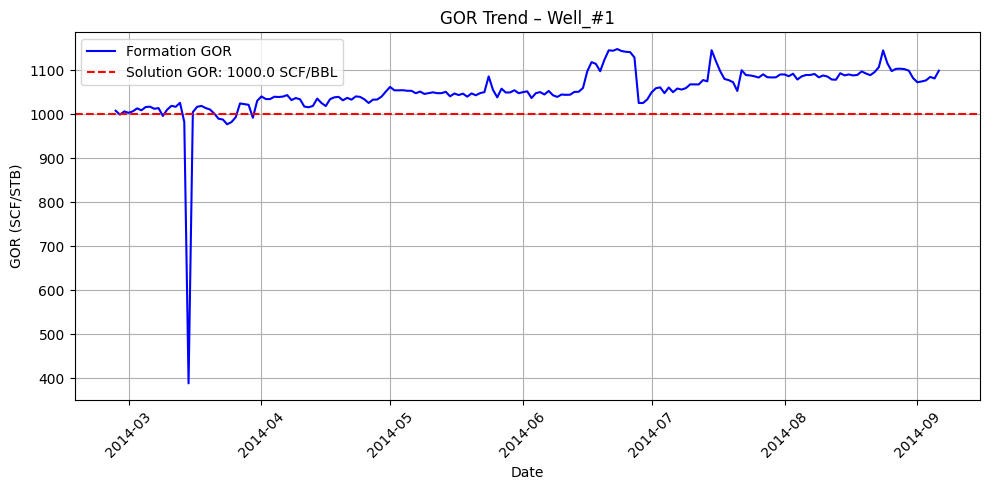

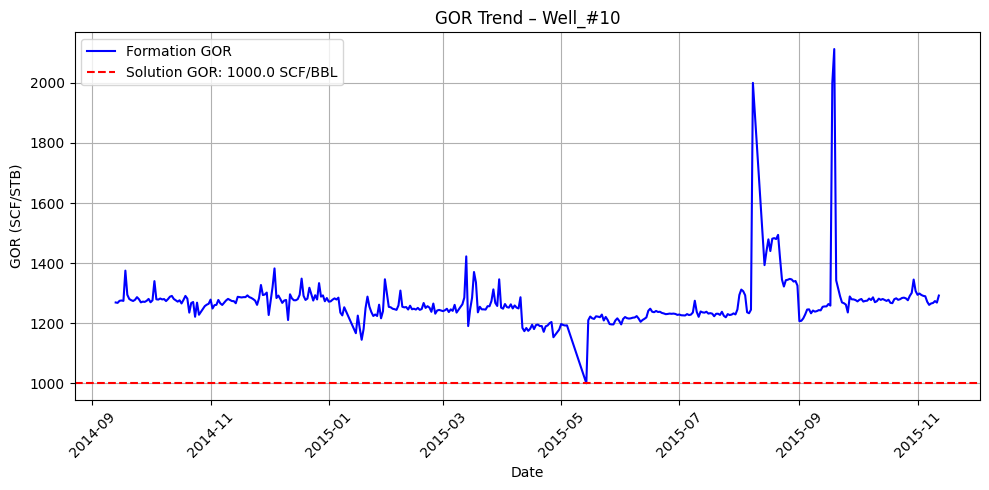

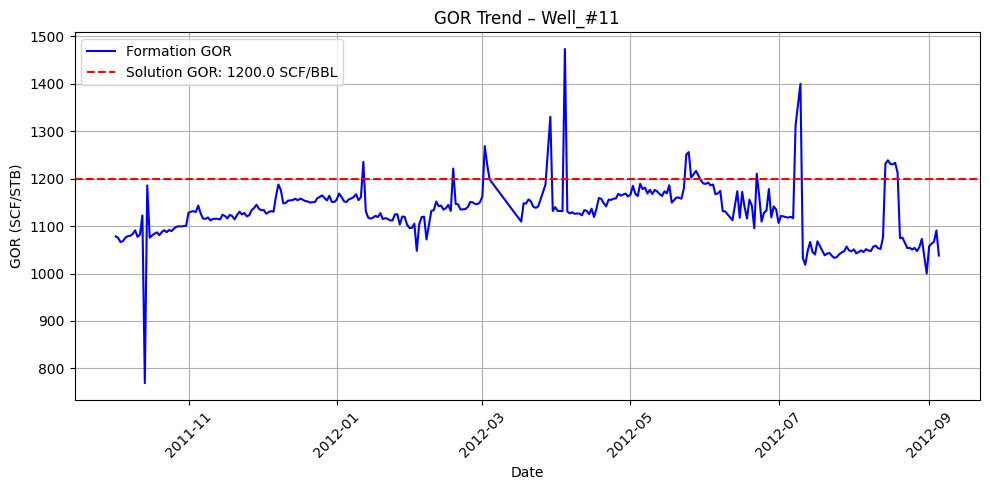

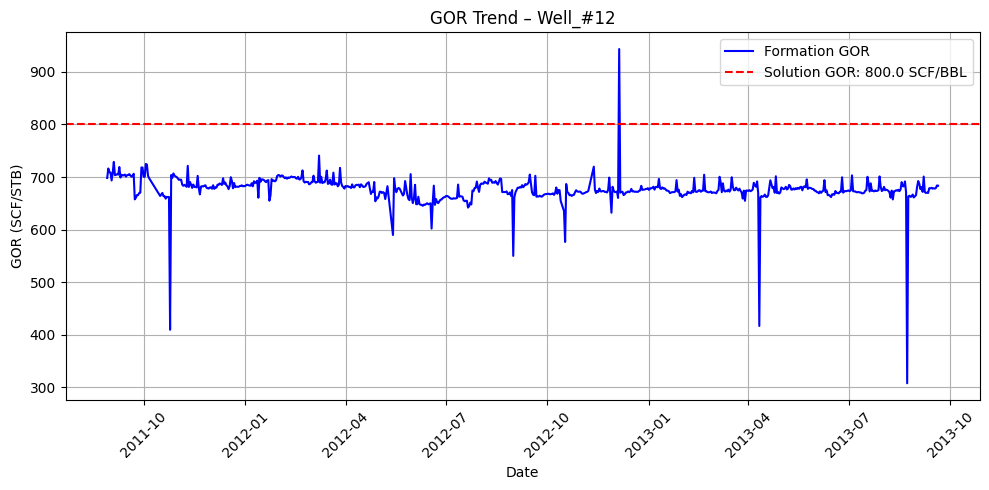

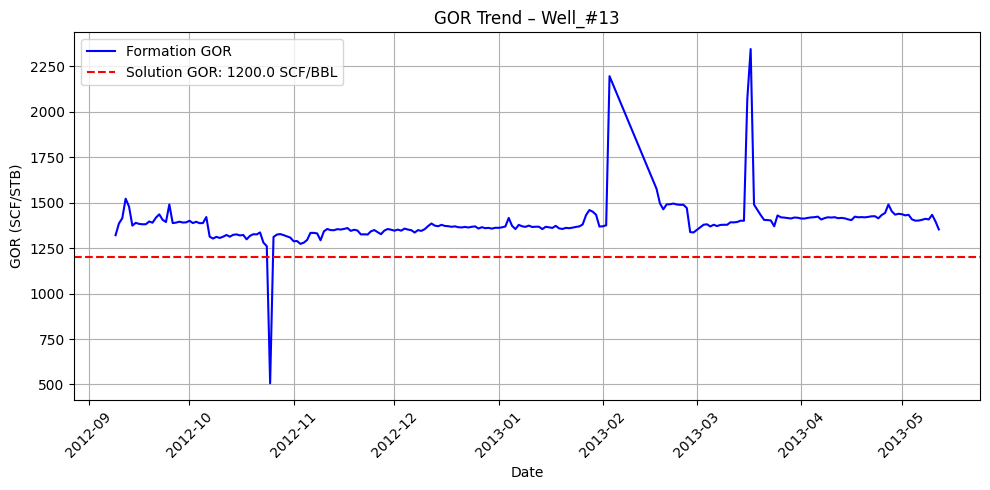

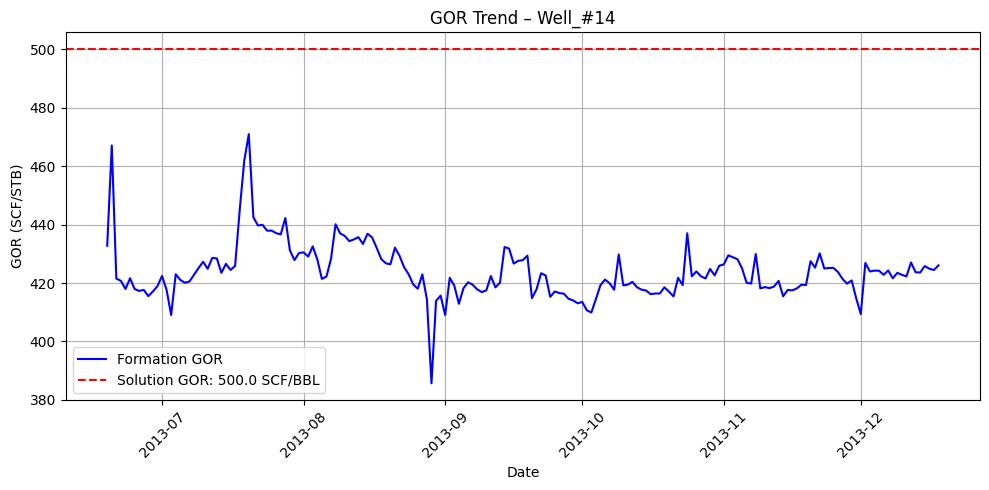

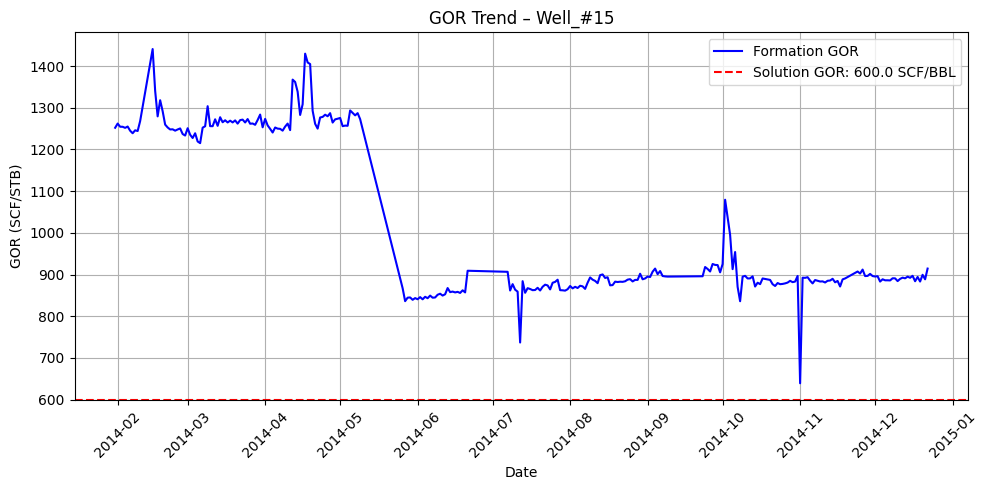

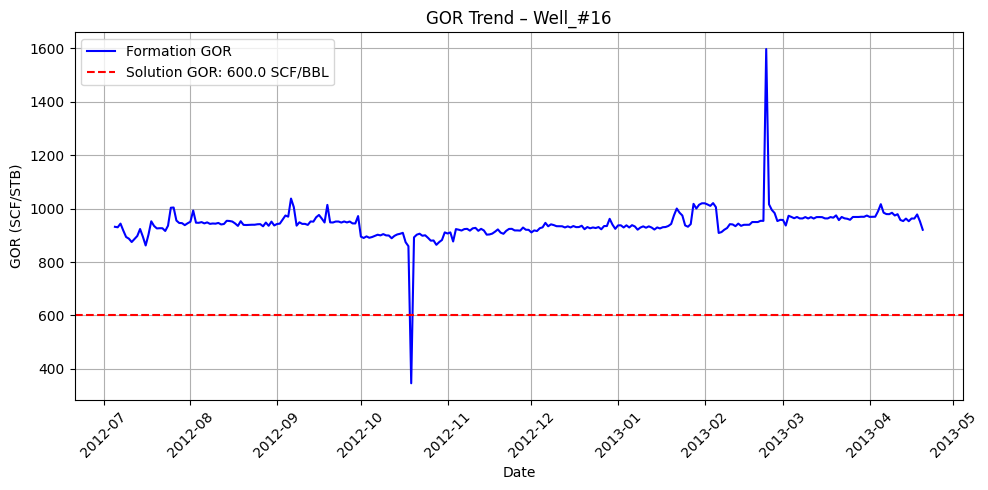

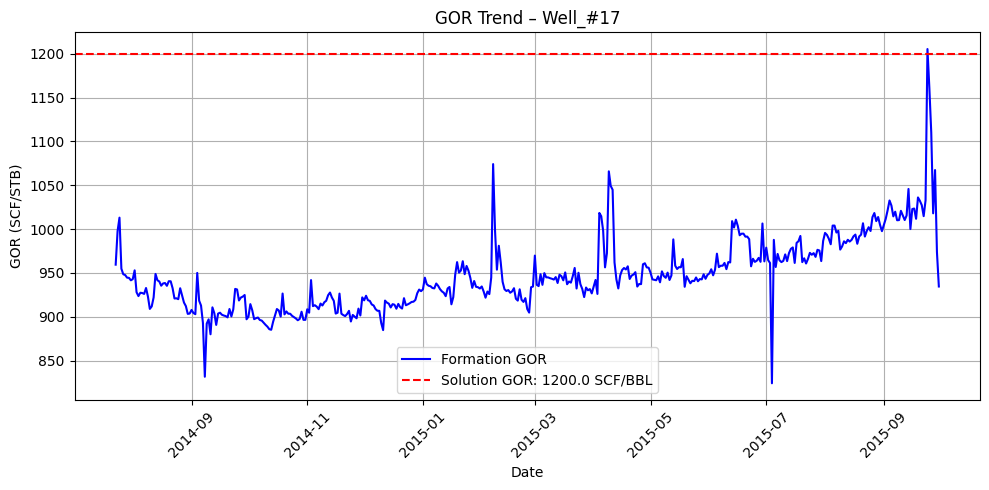

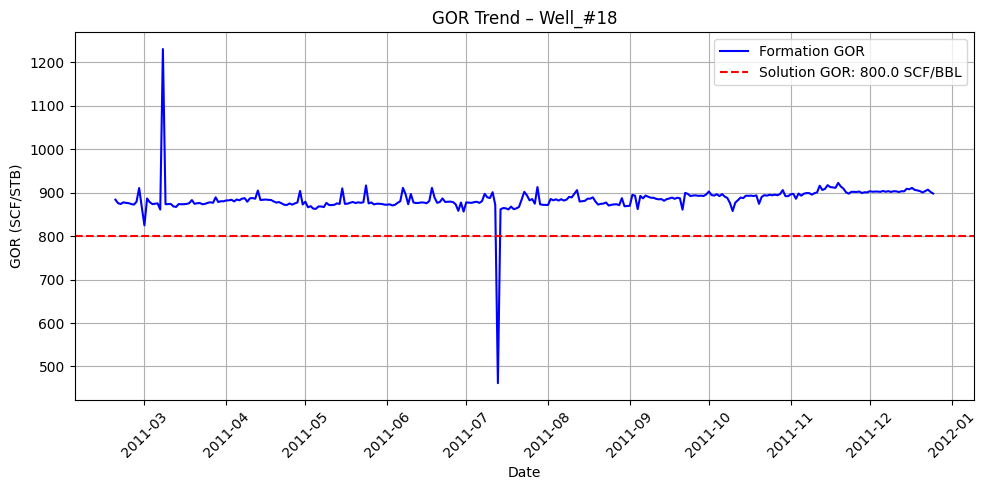

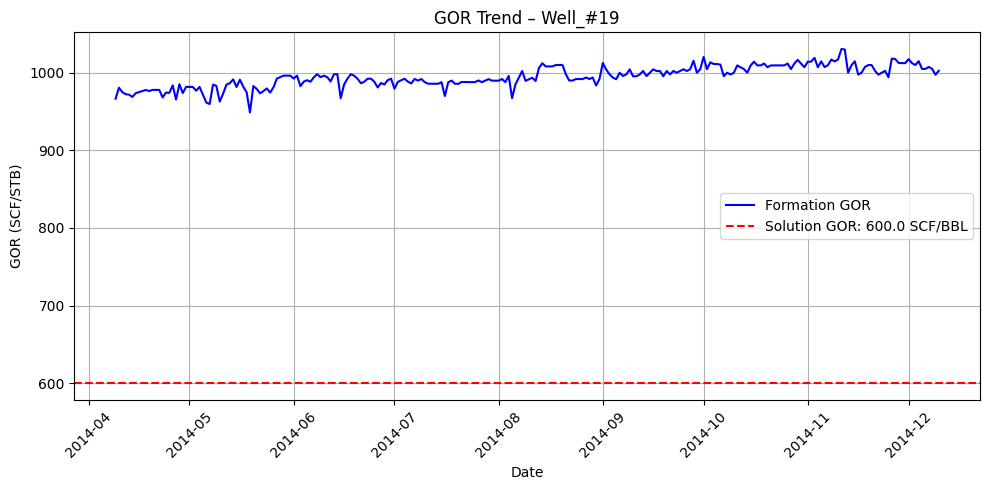

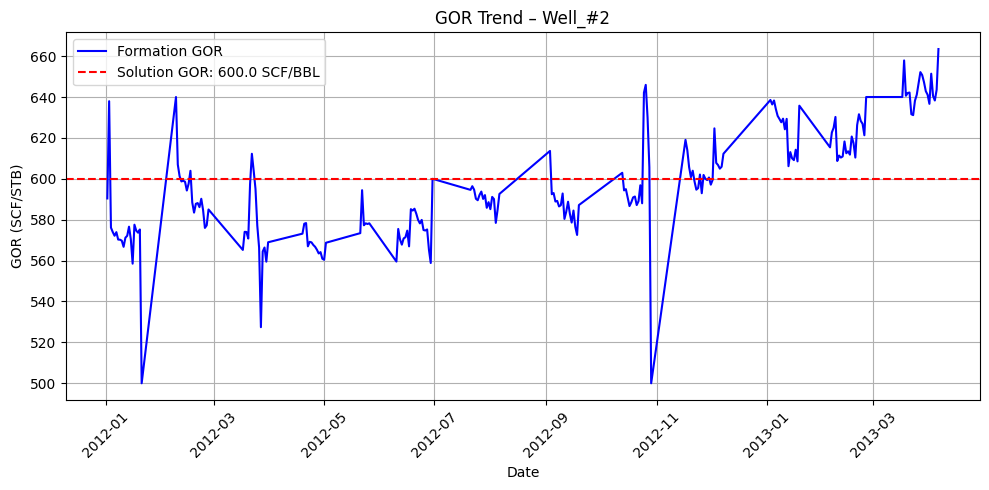

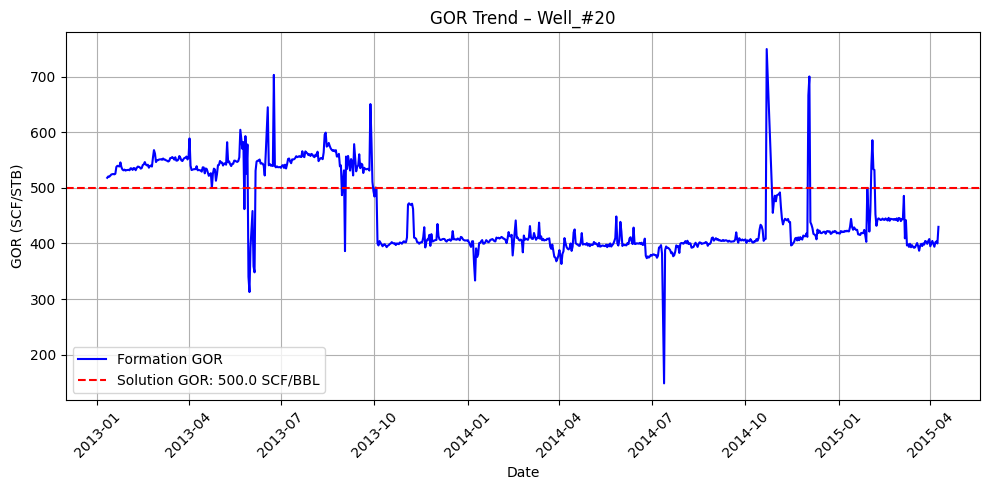

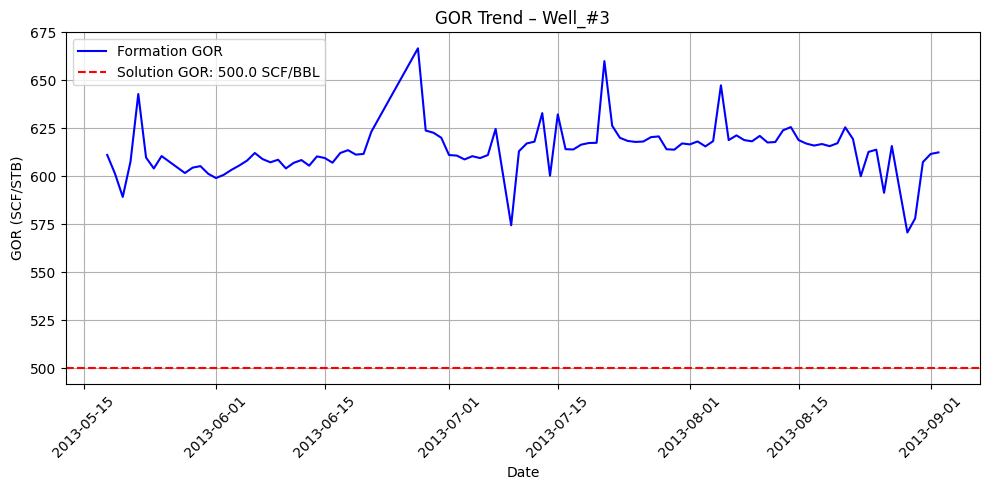

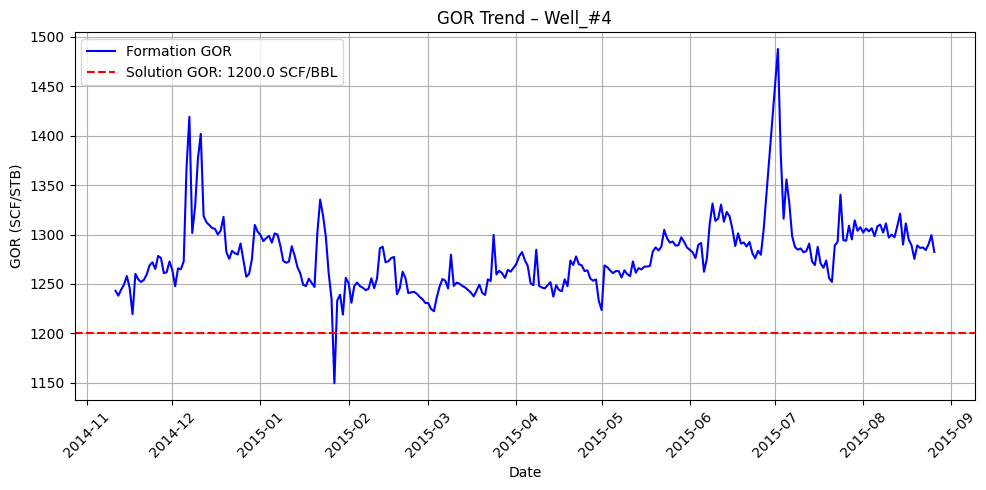

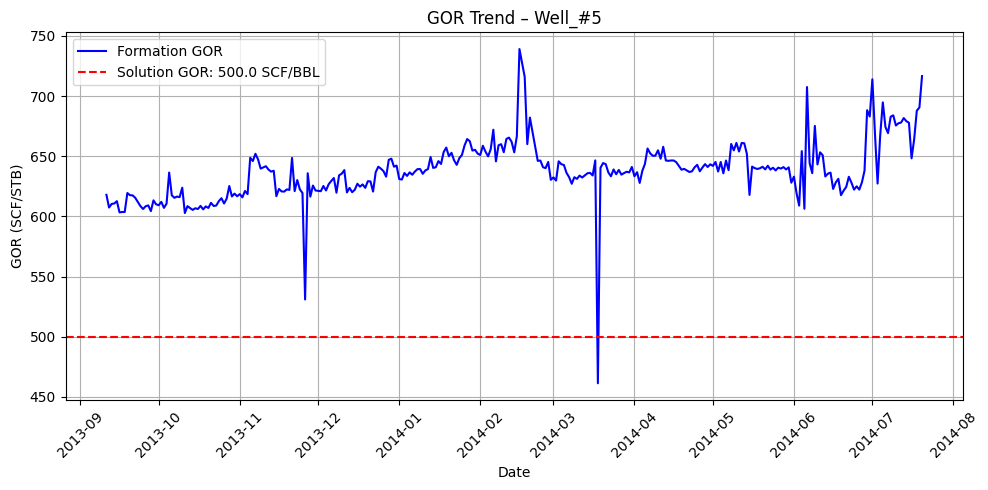

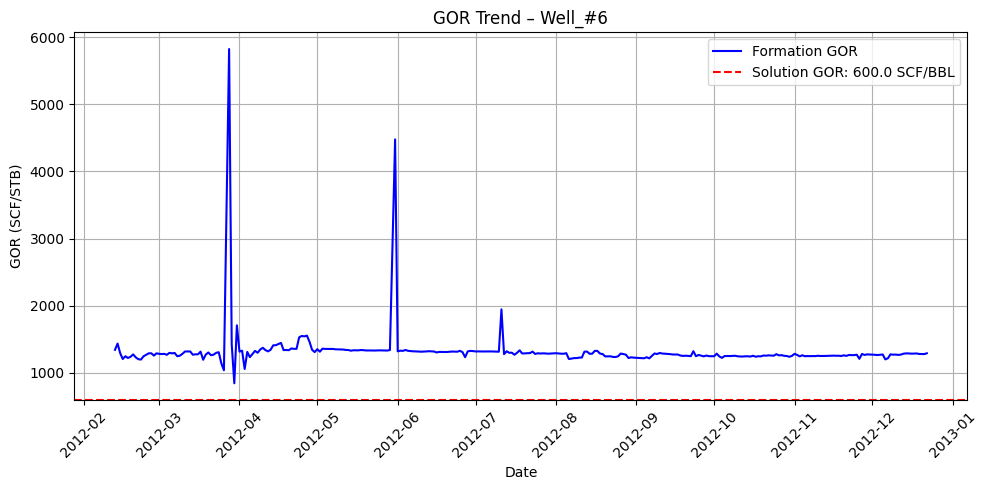

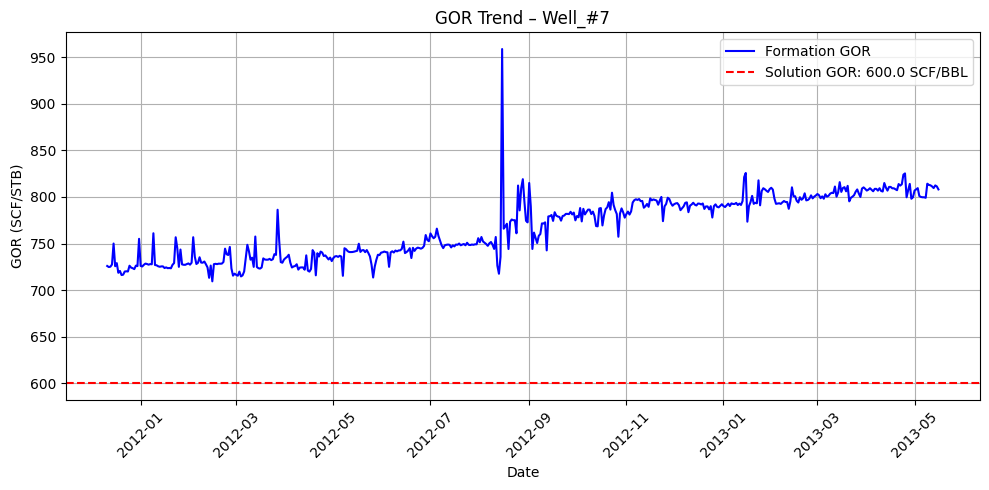

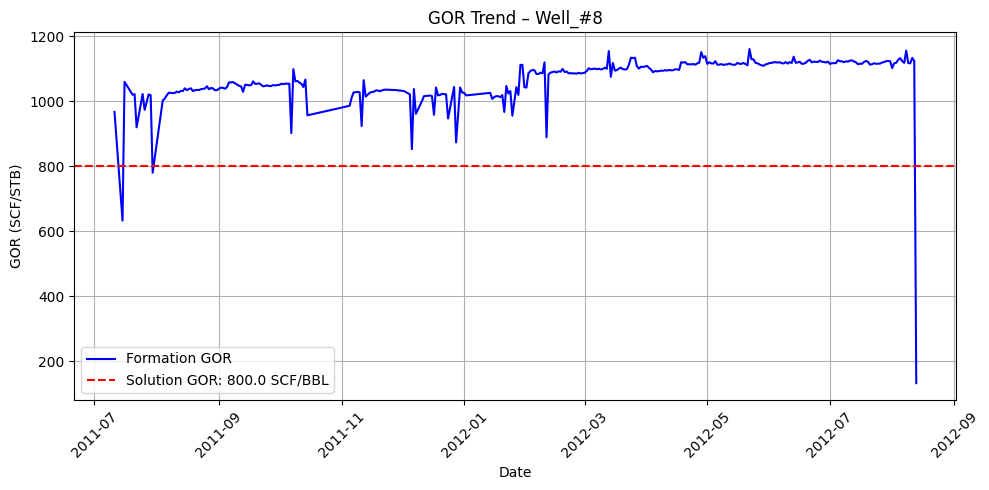

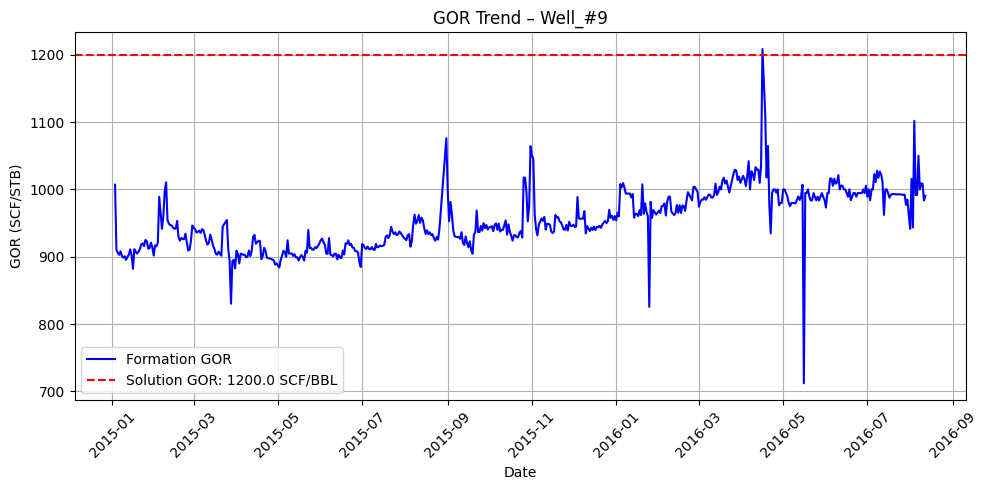

In [48]:
#Filter Data to calculate active production periods i.e where Daily Oil/Gas production > 0
active_production_data = Well_data[(Well_data["GOR (SCF/STB)"] > 0)]

# Plotting GOR trend for a sample well
for name in Well_names:
  sample_well_name = name  # Change this to other wells in a loop if needed
  sample_well_data = active_production_data[active_production_data['WELL_NAME'] == sample_well_name].copy()

  # Get the reservoir name for the sample well
  reservoir_name = Max_bhp_perwell[Max_bhp_perwell['WELL_NAME'] == sample_well_name]['Reservoir Name'].iloc[0]

  # Get the solution GOR for the corresponding reservoir
  solution_gor = reservoir_data[reservoir_data['Reservoir Name'] == reservoir_name]['Solution Gas-Oil-Ratio (SCF/BBL)'].iloc[0]

  plt.figure(figsize=(10, 5))
  plt.plot(sample_well_data['PROD_DATE'], sample_well_data['GOR (SCF/STB)'], label='Formation GOR', color='blue')
  plt.axhline(y=solution_gor, color='red', linestyle='--', label=f'Solution GOR: {solution_gor} SCF/BBL')
  plt.title(f"GOR Trend – {sample_well_name}")
  plt.xlabel("Date")
  plt.ylabel("GOR (SCF/STB)")
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

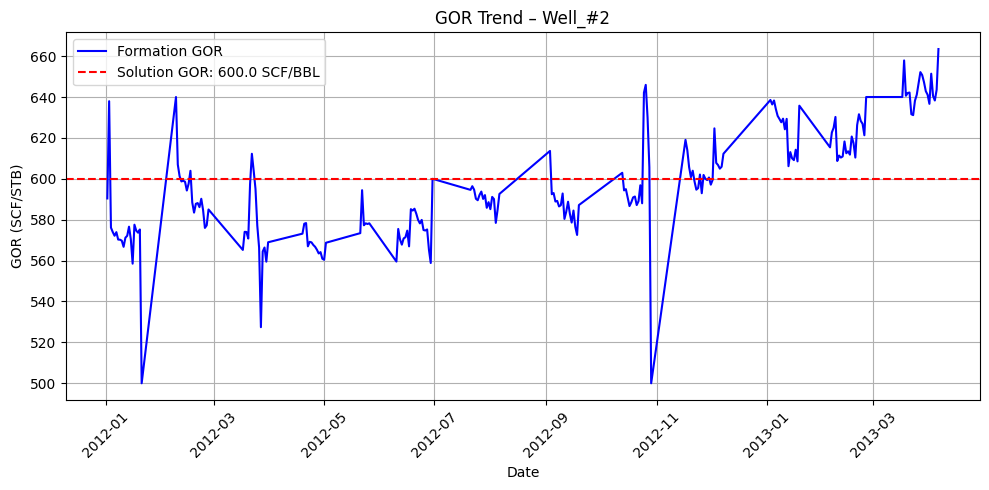

In [49]:
#Filter Data to calculate active production periods i.e where Daily Oil/Gas production > 0
active_production_data = Well_data[(Well_data["GOR (SCF/STB)"] > 0)]

# To plot the filtered data:
sample_well_name = "Well_#2"  # Change this to other wells in a loop if needed
sample_well_data = active_production_data[active_production_data['WELL_NAME'] == sample_well_name].copy()

# Get the reservoir name for the sample well
reservoir_name = Max_bhp_perwell[Max_bhp_perwell['WELL_NAME'] == sample_well_name]['Reservoir Name'].iloc[0]

# Get the solution GOR for the corresponding reservoir
solution_gor = reservoir_data[reservoir_data['Reservoir Name'] == reservoir_name]['Solution Gas-Oil-Ratio (SCF/BBL)'].iloc[0]

plt.figure(figsize=(10, 5))
plt.plot(sample_well_data['PROD_DATE'], sample_well_data['GOR (SCF/STB)'], label='Formation GOR', color='blue')
plt.axhline(y=solution_gor, color='red', linestyle='--', label=f'Solution GOR: {solution_gor} SCF/BBL')
plt.title(f"GOR Trend – {sample_well_name}")
plt.xlabel("Date")
plt.ylabel("GOR (SCF/STB)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Extract Data for Modeling

In [50]:
Extract = pd.merge(Well_data,Merge_data, on='WELL_NAME', how='left')
Extract

,PROD_DATE,WELL_NAME,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),...,Initial Reservoir Pressure (PSI),Bubble Point Pressure (PSI),Current Average Reservoir Pressure (PSI),Solution Gas-Oil-Ratio (SCF/BBL),Formation Volume Factor (RB/STB),Pressure Difference,Reservoir Type,Well Type,Production Type,Formation GOR Trend
0,2014-02-15,Well_#1,0.00,4050.0,189.866,0.000,1.17951,482.460,50.864,0.0,...,4500.0,4300.0,4200.0,1000.0,1.30,104.0,Undersat,GL,Unsteady,aSolGOR
1,2014-02-16,Well_#1,0.00,3961.0,189.945,0.000,2.99440,328.601,47.668,0.0,...,4500.0,4300.0,4200.0,1000.0,1.30,104.0,Undersat,GL,Unsteady,aSolGOR
2,2014-02-17,Well_#1,0.00,3961.0,190.004,0.000,1.90349,387.218,48.962,0.0,...,4500.0,4300.0,4200.0,1000.0,1.30,104.0,Undersat,GL,Unsteady,aSolGOR
3,2014-02-18,Well_#1,0.00,3964.0,190.020,0.000,0.00000,308.980,46.636,0.0,...,4500.0,4300.0,4200.0,1000.0,1.30,104.0,Undersat,GL,Unsteady,aSolGOR
4,2014-02-19,Well_#1,0.00,3965.0,190.107,0.000,30.20760,196.057,47.297,0.0,...,4500.0,4300.0,4200.0,1000.0,1.30,104.0,Undersat,GL,Unsteady,aSolGOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7950,2016-08-08,Well_#9,24.00,1343.0,159.142,677.569,30.25111,81.029,74.861,247543.0,...,2800.0,2800.0,2400.0,1200.0,1.37,67.0,Saturated,GL,Unsteady,bSolGOR
7951,2016-08-09,Well_#9,23.75,1344.0,153.782,669.660,29.34552,81.968,75.579,247654.0,...,2800.0,2800.0,2400.0,1200.0,1.37,67.0,Saturated,GL,Unsteady,bSolGOR
7952,2016-08-10,Well_#9,24.00,1328.0,154.673,677.784,30.23203,81.880,76.391,247772.0,...,2800.0,2800.0,2400.0,1200.0,1.37,67.0,Saturated,GL,Unsteady,bSolGOR
7953,2016-08-11,Well_#9,24.00,1339.0,154.959,682.046,30.21677,82.049,75.741,247893.0,...,2800.0,2800.0,2400.0,1200.0,1.37,67.0,Saturated,GL,Unsteady,bSolGOR


In [51]:
Extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7955 entries, 0 to 7954
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   PROD_DATE                                 7955 non-null   datetime64[ns]
 1   WELL_NAME                                 7955 non-null   object        
 2   ON_STREAM_HRS                             7955 non-null   float64       
 3   BOTTOMHOLE_FLOWING_PRESSURE (PSI)         7955 non-null   float64       
 4   DOWNHOLE_TEMPERATURE (deg F)              7955 non-null   float64       
 5   ANNULUS_PRESS (PSI)                       7955 non-null   float64       
 6   CHOKE_SIZE (%)                            7955 non-null   float64       
 7   WELL_HEAD_PRESSURE (PSI)                  7955 non-null   float64       
 8   WELL_HEAD_TEMPERATURE (deg F)             7955 non-null   float64       
 9   CUMULATIVE_OIL_PROD (STB)     

In [52]:
#convert Extract to csv
Extract.to_csv('Extract.csv', index=False)

##Watercut

In [53]:
# Classify well
from scipy.stats import linregress

well = "Well_#8"
mask = Well_data["WELL_NAME"] == well
Well_data_mask = Well_data[mask]

#Filter data based on Total liquid production
act_liq_production = Well_data_mask[Well_data_mask['Watercut'] > 0].copy()

oil_rate = act_liq_production['CUMULATIVE_OIL_PROD (STB)'].diff().fillna(0)
water_rate = act_liq_production['CUMULATIVE_WATER_PROD (BBL)'].diff().fillna(0)
total_liquid = oil_rate + water_rate
watercut = (water_rate / total_liquid).replace([np.inf, -np.inf], 0).fillna(0)

# Calculate the 10th and 90th percentiles
lower_bound = watercut.quantile(0.10)
upper_bound = watercut.quantile(0.90)

# Filter the DataFrame
watercut_filtered = watercut[watercut <= upper_bound]

watercut_smooth = watercut_filtered.rolling(window=5, min_periods=1).mean()
t = np.arange(len(watercut_smooth))
slope, _, r_value, _, _ = linregress(t, watercut_smooth)

# Detect local variability (combination trend)
num_days = min(20,len(watercut_smooth)//9)
loc_slope = []
for i in range(0,len(watercut_smooth),num_days):
  local_val = watercut_smooth.iloc[i:i+num_days]
  k = np.arange(len(local_val))
  if len(k) > 1:
      slope1, _, r_value, _, _ = linregress(k,local_val)
      loc_slope.append(slope1)
  else:
      loc_slope.append(np.nan) # Handle cases with less than 2 data points for linregress

locc_slope = pd.Series(loc_slope)
locc_slope.fillna(0, inplace=True)
locc_slope

,0
0,0.011341
1,0.003439
2,0.003856
3,0.001419
4,-0.002939
5,-0.001175
6,-0.000377
7,0.005482
8,0.000747
9,-0.000210


In [54]:
slope

np.float64(0.0008768661323683044)

In [55]:
watercut_range = watercut_smooth.max() - watercut_smooth.min()
watercut_std = watercut_smooth.std()
watercut_range, watercut_std

(0.6229591278760082, 0.08723709377009166)

In [56]:

ups = (locc_slope > 0.0001).sum()
downs = (locc_slope < -0.0001).sum()
neutral = (abs(locc_slope) < 0.00001).sum()
total = len(locc_slope)

if ups/total > 0.2 and downs/total > 0.3:
    print('Combination')
elif neutral/total > 0.2 and ups/total > 0.3:
    print('Combination')
elif neutral/total > 0.2 and downs/total > 0.3:
    print('Combination')
elif ups/total >= 0.6:
    print('Incr')
elif downs/total > 0.5:
    print('Decr')
elif neutral/total > 0.3:
    print('Flat')
elif slope < 0.0001:
    print('Flat')

print(ups/total,downs/total,neutral/total,total)

Combination
0.625 0.375 0.0 16


In [57]:
slope

np.float64(0.0008768661323683044)

In [58]:
slope < 0.0001

np.False_

In [59]:
(abs(locc_slope)).max()

0.011340878887115819

In [60]:
compare = pd.DataFrame({"watercut":watercut,"watercut_smooth":watercut_smooth})
compare

,watercut,watercut_smooth
2596,0.000000,0.000000
2599,0.282895,0.141447
2600,0.408649,0.230514
2603,0.372008,0.265888
2604,0.372613,0.287233
...,...,...
2961,0.624663,NaN
2962,0.625270,NaN
2963,0.624597,NaN
2964,0.623927,NaN


In [61]:
#Trial 1
from scipy.stats import linregress

def classify_watercut_trend(well_df):
    # Compute daily rates
    oil_rate = well_df['CUMULATIVE_OIL_PROD (STB)'].diff().fillna(0)
    water_rate = well_df['CUMULATIVE_WATER_PROD (BBL)'].diff().fillna(0)
    total_liquid = oil_rate + water_rate
    watercut = (water_rate / total_liquid).fillna(0)

    # Smooth with rolling mean
    watercut_smooth = watercut.rolling(window=5, min_periods=1).mean()

    # Fit linear trend
    time = range(len(watercut_smooth))
    # Handle cases where there's not enough data for regression
    if len(time) < 2 or np.std(watercut_smooth) == 0:
        return 'Flat'
    slope, _, r_value, _, _ = linregress(time, watercut_smooth)

    # Heuristic thresholds
    if abs(slope) < 0.00015:
        return 'Flat'
    elif slope > 0.0001:
        return 'Increasing'
    elif slope < -0.0001:
        return 'Decreasing'
    else:
        return 'Combination'

#Filter data based on Total liquid production
act_liq_production = Well_data[Well_data['Watercut'] > 0].copy()


# Apply to each well
trend_results = []
for well, group in act_liq_production.groupby('WELL_NAME'):
    group = group.sort_values('PROD_DATE')
    trend = classify_watercut_trend(group)
    trend_results.append({'WELL_NAME': well, 'Watercut Trend': trend})

watercut_trend_df = pd.DataFrame(trend_results)
print(watercut_trend_df)

   WELL_NAME Watercut Trend
0    Well_#1     Increasing
1   Well_#10           Flat
2   Well_#11     Increasing
3   Well_#12     Increasing
4   Well_#13           Flat
5   Well_#14           Flat
6   Well_#15     Increasing
7   Well_#16           Flat
8   Well_#17           Flat
9   Well_#18     Increasing
10  Well_#19     Increasing
11   Well_#2     Increasing
12  Well_#20     Increasing
13   Well_#3           Flat
14   Well_#4     Increasing
15   Well_#5     Increasing
16   Well_#6           Flat
17   Well_#7     Increasing
18   Well_#8     Increasing
19   Well_#9     Increasing


In [62]:
#Trial 2
from scipy.stats import linregress

def classify_watercut_trend(well_df):
    oil_rate = well_df['CUMULATIVE_OIL_PROD (STB)'].diff().fillna(0)
    water_rate = well_df['CUMULATIVE_WATER_PROD (BBL)'].diff().fillna(0)
    total_liquid = oil_rate + water_rate
    watercut = (water_rate / total_liquid).replace([np.inf, -np.inf], 0).fillna(0)

    watercut_smooth = watercut.rolling(window=5, min_periods=1).mean()
    t = np.arange(len(watercut_smooth))
    slope, _, r_value, _, _ = linregress(t, watercut_smooth)

    # Detect local variability (combination trend)
    local_slopes = watercut_smooth.rolling(20).apply(
        lambda y: linregress(np.arange(len(y)), y)[0] if len(y) > 1 else 0,
        raw=False
    )
    ups = (local_slopes > 0.0001).sum()
    downs = (local_slopes < -0.0001).sum()
    neutral = (abs(local_slopes) < 0.00005).sum()
    total = len(local_slopes)

    if ups/total > 0.2 and downs/total > 0.2:
        return 'Combination'
    elif neutral/total > 0.5 and ups/total > 0.2:
      return 'Combination'
    elif ups/total > 0.2 and slope > 0.0001:
        return 'Increasing'
    elif downs/total > 0.5:
        return 'Decreasing'
    elif neutral/total > 0.1:
        return 'Flat'
    # elif slope > 0.0005:
    #     return 'Increasing'
    # elif slope < -0.0005:
    #     return 'Decreasing'
    # else:
    #     return 'Flat'

#Filter data based on Total liquid production
act_liq_production = Well_data[Well_data['Watercut'] > 0].copy()


# Apply to each well
trend_results = []
for well, group in act_liq_production.groupby('WELL_NAME'):
    group = group.sort_values('PROD_DATE')
    trend = classify_watercut_trend(group)
    trend_results.append({'WELL_NAME': well, 'Watercut Trend': trend})

watercut_trend_df = pd.DataFrame(trend_results)
print(watercut_trend_df)

   WELL_NAME Watercut Trend
0    Well_#1     Increasing
1   Well_#10    Combination
2   Well_#11    Combination
3   Well_#12    Combination
4   Well_#13           Flat
5   Well_#14     Increasing
6   Well_#15    Combination
7   Well_#16           Flat
8   Well_#17    Combination
9   Well_#18    Combination
10  Well_#19     Increasing
11   Well_#2    Combination
12  Well_#20    Combination
13   Well_#3    Combination
14   Well_#4    Combination
15   Well_#5     Increasing
16   Well_#6    Combination
17   Well_#7     Increasing
18   Well_#8    Combination
19   Well_#9     Increasing


In [63]:
#Trial 3 Worked!!!
from scipy.stats import linregress

def classify_watercut_trend(well_df):
    # well = "Well_#1"
    # mask = Well_data["WELL_NAME"] == well
    # Well_data_mask = Well_data[mask]

    #Filter data based on Active Total liquid production
    act_liq_production = well_df[well_df['Watercut'] > 0].copy()

    #Calculate Rates
    oil_rate = act_liq_production['CUMULATIVE_OIL_PROD (STB)'].diff().fillna(0)
    water_rate = act_liq_production['CUMULATIVE_WATER_PROD (BBL)'].diff().fillna(0)
    total_liquid = oil_rate + water_rate
    watercut = (water_rate / total_liquid).replace([np.inf, -np.inf], 0).fillna(0)

    # Calculate the 10th and 90th percentiles
    lower_bound = watercut.quantile(0.10)
    upper_bound = watercut.quantile(0.90)

    # Filter the DataFrame to remove outliers
    watercut_filtered = watercut[watercut <= upper_bound]

    watercut_smooth = watercut_filtered.rolling(window=5, min_periods=1).mean()
    t = np.arange(len(watercut_smooth))
    slope, _, r_value, _, _ = linregress(t, watercut_smooth)

    # Detect local variability (combination trend)
    num_days = min(20,len(watercut_smooth)//9)
    loc_slope = []
    for i in range(0,len(watercut_smooth),num_days):
      local_val = watercut_smooth.iloc[i:i+num_days]
      k = np.arange(len(local_val))
      if len(k) > 1:
          slope1, _, r_value, _, _ = linregress(k,local_val)
          loc_slope.append(slope1)
      else:
          loc_slope.append(np.nan) # Handle cases with less than 2 data points for linregress

    locc_slope = pd.Series(loc_slope)
    locc_slope.fillna(0, inplace=True)
    locc_slope

    ups = (locc_slope > 0.0001).sum()
    downs = (locc_slope < -0.0001).sum()
    neutral = (abs(locc_slope) < 0.00001).sum()
    total = len(locc_slope)

    if ups/total > 0.2 and downs/total > 0.3:
        return('Combo')
    elif neutral/total > 0.2 and ups/total > 0.3:
        return('Combo')
    elif neutral/total > 0.2 and downs/total > 0.3:
        return('Combo')
    elif ups/total >= 0.6:
        return('Incr')
    elif downs/total > 0.5:
        return('Decr')
    elif neutral/total > 0.3:
        return('Flat')
    elif slope < 0.00011:
        return('Flat')

    return(ups/total,downs/total,neutral/total,total)


# Apply to each well
trend_results = []
for well, group in Well_data.groupby('WELL_NAME'):
    group = group.sort_values('PROD_DATE')
    trend = classify_watercut_trend(group)
    trend_results.append({'WELL_NAME': well, 'Watercut Trend': trend})

watercut_trend_df = pd.DataFrame(trend_results)
print(watercut_trend_df)

   WELL_NAME Watercut Trend
0    Well_#1           Incr
1   Well_#10          Combo
2   Well_#11           Incr
3   Well_#12           Incr
4   Well_#13           Flat
5   Well_#14          Combo
6   Well_#15          Combo
7   Well_#16           Flat
8   Well_#17          Combo
9   Well_#18           Incr
10  Well_#19           Incr
11   Well_#2          Combo
12  Well_#20           Incr
13   Well_#3          Combo
14   Well_#4          Combo
15   Well_#5           Incr
16   Well_#6           Flat
17   Well_#7           Incr
18   Well_#8          Combo
19   Well_#9           Incr


In [64]:
#Trial 4 test
from scipy.stats import linregress

from scipy.stats import linregress

def classify_watercut_trend(well_df):
    # well = "Well_#1"
    # mask = Well_data["WELL_NAME"] == well
    # Well_data_mask = Well_data[mask]

    #Filter data based on Active Total liquid production
    act_liq_production = well_df[well_df['Watercut'] > 0].copy()

    #Calculate Rates
    oil_rate = act_liq_production['CUMULATIVE_OIL_PROD (STB)'].diff().fillna(0)
    water_rate = act_liq_production['CUMULATIVE_WATER_PROD (BBL)'].diff().fillna(0)
    total_liquid = oil_rate + water_rate
    watercut = (water_rate / total_liquid).replace([np.inf, -np.inf], 0).fillna(0)

    # Calculate the 10th and 90th percentiles
    lower_bound = watercut.quantile(0.10)
    upper_bound = watercut.quantile(0.90)

    # Filter the DataFrame to remove outliers
    watercut_filtered = watercut[watercut <= upper_bound]

    watercut_smooth = watercut_filtered.rolling(window=5, min_periods=1).mean()
    t = np.arange(len(watercut_smooth))
    slope, _, r_value, _, _ = linregress(t, watercut_smooth)

    # Detect local variability (combination trend)
    num_days = min(20,len(watercut_smooth)//9)
    loc_slope = []
    for i in range(0,len(watercut_smooth),num_days):
      local_val = watercut_smooth.iloc[i:i+num_days]
      k = np.arange(len(local_val))
      if len(k) > 1:
          slope1, _, r_value, _, _ = linregress(k,local_val)
          loc_slope.append(slope1)
      else:
          loc_slope.append(np.nan) # Handle cases with less than 2 data points for linregress

    locc_slope = pd.Series(loc_slope)
    locc_slope.fillna(0, inplace=True)
    locc_slope

    ups = (locc_slope > 0.0001).sum()
    downs = (locc_slope < -0.0001).sum()
    neutral = (abs(locc_slope) < 0.00001).sum()
    total = len(locc_slope)

    if slope > 0:
      if PI_std < 0.1:
        return('Flat')
      elif abs(slope) < 0.00011:
        return('Flat')
      if ups/total > 0.25 and downs/total >= 0.2:
        return('Combo')
      elif neutral/total > 0.2 and ups/total > 0.3:
        return('Combo')
      elif ups/total >= 0.5:
          return('Incr')

    elif slope < 0:
      if PI_std < 0.1:
        return('Flat')
      elif abs(slope) < 0.00011:
        return('Flat')
      elif ups/total > 0.38 and downs/total >= 0.2:
        return('Combo')
      elif neutral/total > 0.2 and downs/total > 0.3:
        return('Combo')
      elif downs/total >= 0.5:
          return('Decr')

    elif neutral/total > 0.6:
        return('Flat')
    elif abs(slope) < 0.00011:
        return('Flat')

    return(ups/total,downs/total,neutral/total,total)

 # Apply to each well
trend_results = []
for well, group in Well_data.groupby('WELL_NAME'):
    group = group.sort_values('PROD_DATE')
    trend = classify_watercut_trend(group)
    trend_results.append({'WELL_NAME': well, 'watercut Trend': trend})

watercut_trend_df = pd.DataFrame(trend_results)
print(watercut_trend_df)

NameError: name 'PI_std' is not defined

##Visualize Watercut Plot against Time

In [ ]:
#Filter data based on Active Total liquid production
act_liq_production = Well_data[Well_data['Watercut'] > 0]

# Plotting Watercut trend for a sample well
for name in Well_names:
  sample_well_name = name  # Change this to other wells in a loop if needed
  sample_well_data = act_liq_production[act_liq_production['WELL_NAME'] == sample_well_name].copy()

  plt.figure(figsize=(10, 5))
  plt.plot(sample_well_data['PROD_DATE'], sample_well_data['Watercut'], label='Watercut', color='blue')
  #plt.axhline(y=solution_gor, color='red', linestyle='--', label=f'Solution GOR: {solution_gor} SCF/BBL')
  plt.title(f"Watercut Trend – {sample_well_name}")
  plt.xlabel("Date")
  plt.ylabel("Watercut")
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
Merge_data = Merge_data.merge(watercut_trend_df, on='WELL_NAME', how='left')
Merge_data

In [ ]:
#Merge Watercut Trend to Extract
Extract = Extract.merge(watercut_trend_df, on='WELL_NAME', how='left')

In [ ]:
Extract.head()

In [ ]:
#convert Extract to csv
Extract.to_csv('Extract2.csv', index=False)

##Productivity Index

In [ ]:
Well_data["PI Index"] = Extract["OIL RATE (STB/DAY)"] / (Extract["Current Average Reservoir Pressure (PSI)"] - Extract["BOTTOMHOLE_FLOWING_PRESSURE (PSI)"]
)
# Handle infinite/negative values (e.g., zero drawdown)
Well_data["PI Index"] = Well_data["PI Index"].replace([float('inf'), -float('inf')], 0).clip(lower=0)
Well_data["PI Index"].tail()

In [ ]:
Extract["PI Index"] = Well_data["PI Index"]


In [ ]:
well = "Well_#13"
mask = Well_data["WELL_NAME"] == well
Well_data_mask = Well_data[mask]

#Filter data based on Active oil production
act_liq_production = Well_data_mask[Well_data_mask["PI Index"] > 0].copy()

PI = act_liq_production['PI Index']

# Smooth with rolling mean
PI_smooth = PI.rolling(window=5, min_periods=1).mean()

# Calculate the 10th and 90th percentiles
lower_bound = PI.quantile(0.10)
upper_bound = PI.quantile(0.90)

# Filter the DataFrame to remove outliers
PI_filtered = PI[PI <= upper_bound]

PI_smooth = PI_filtered.rolling(window=5, min_periods=1).mean()
t = np.arange(len(PI_smooth))
slope, _, r_value, _, _ = linregress(t, PI_smooth)

# Detect local variability (combination trend)
num_days = min(20,len(PI_smooth)//9)
loc_slope = []
for i in range(0,len(PI_smooth),num_days):
  local_val = PI_smooth.iloc[i:i+num_days]
  k = np.arange(len(local_val))
  if len(k) > 1:
      slope1, _, r_value, _, _ = linregress(k,local_val)
      loc_slope.append(slope1)
  else:
      loc_slope.append(np.nan) # Handle cases with less than 2 data points for linregress

PI_std = PI_smooth.std()
locc_slope = pd.Series(loc_slope)
locc_slope.fillna(0, inplace=True)
locc_slope

In [ ]:
ups = (locc_slope > 0.0001).sum()
downs = (locc_slope < -0.0001).sum()
neutral = (abs(locc_slope) < 0.00001).sum()
total = len(locc_slope)

if slope > 0:
  if PI_std < 0.05:
    print('Flat')
  if ups/total > 0.25 and downs/total >= 0.2:
    print('Combo')
  elif neutral/total > 0.2 and ups/total > 0.3:
    print('Combo')
  elif ups/total >= 0.5:
      print('Incr')

elif slope < 0:
  if PI_std < 0.05:
    print('Flat')
  elif ups/total > 0.38 and downs/total >= 0.2:
    print('Combo')
  elif neutral/total > 0.2 and downs/total > 0.3:
      print('Combo')
  elif downs/total >= 0.5:
      print('Decr')

elif neutral/total > 0.6:
    print('Flat')
elif abs(slope) < 0.00011:
    print('Flat')

print(ups/total,downs/total,neutral/total,total)

In [ ]:
slope

In [ ]:
PI_range = PI_smooth.max() - PI_smooth.min()
PI_std = PI_smooth.std()
PI_range, PI_std

In [ ]:
#Trail 1
from scipy.stats import linregress

def classify_PI_trend(well_df):
    # Compute daily rates
    # oil_rate = well_df['CUMULATIVE_OIL_PROD (STB)'].diff().fillna(0)
    # water_rate = well_df['CUMULATIVE_WATER_PROD (BBL)'].diff().fillna(0)
    # total_liquid = oil_rate + water_rate
    PI = well_df['PI Index']

    # Smooth with rolling mean
    PI_smooth = PI.rolling(window=5, min_periods=1).mean()

    # Fit linear trend
    time = range(len(PI_smooth))
    # Handle cases where there's not enough data for regression
    if len(time) < 2 or np.std(PI_smooth) == 0:
        return 'Flat'
    slope, _, r_value, _, _ = linregress(time, PI_smooth)

    # Heuristic thresholds
    if abs(slope) < 0.0005:
        return 'Flat'
    elif slope > 0.001:
        return 'Increasing'
    elif slope < -0.001:
        return 'Decreasing'
    else:
        return 'Combination'

#Filter data based on Active oil production
act_liq_production = Well_data[Well_data["PI Index"] > 0].copy()


# Apply to each well
trend_results = []
for well, group in act_liq_production.groupby('WELL_NAME'):
    group = group.sort_values('PROD_DATE')
    trend = classify_PI_trend(group)
    trend_results.append({'WELL_NAME': well, 'PI Trend': trend})

PI_trend_df = pd.DataFrame(trend_results)
print(PI_trend_df)

In [ ]:
#Trial 2
from scipy.stats import linregress

def classify_PI_trend(well_df):

    #Filter data based on Active oil production
    act_liq_production = well_df[well_df["PI Index"] > 0].copy()

    PI = act_liq_production['PI Index']

    # Smooth with rolling mean
    PI_smooth = PI.rolling(window=5, min_periods=1).mean()

    # Calculate the 10th and 90th percentiles
    lower_bound = PI.quantile(0.10)
    upper_bound = PI.quantile(0.90)

    # Filter the DataFrame to remove outliers
    PI_filtered = PI[PI <= upper_bound]

    PI_smooth = PI_filtered.rolling(window=5, min_periods=1).mean()
    t = np.arange(len(PI_smooth))
    slope, _, r_value, _, _ = linregress(t, PI_smooth)

    # Detect local variability (combination trend)
    num_days = min(20,len(PI_smooth)//9)
    loc_slope = []
    for i in range(0,len(PI_smooth),num_days):
      local_val = PI_smooth.iloc[i:i+num_days]
      k = np.arange(len(local_val))
      if len(k) > 1:
          slope1, _, r_value, _, _ = linregress(k,local_val)
          loc_slope.append(slope1)
      else:
          loc_slope.append(np.nan) # Handle cases with less than 2 data points for linregress

    locc_slope = pd.Series(loc_slope)
    locc_slope.fillna(0, inplace=True)
    locc_slope

    ups = (locc_slope > 0.0001).sum()
    downs = (locc_slope < -0.0001).sum()
    neutral = (abs(locc_slope) < 0.00001).sum()
    total = len(locc_slope)

    if ups/total > 0.2 and downs/total > 0.3:
        return('Combo')
    elif neutral/total > 0.2 and ups/total > 0.3:
        return('Combo')
    elif neutral/total > 0.2 and downs/total > 0.3:
        return('Combo')
    elif ups/total >= 0.6:
        return('Incr')
    elif downs/total > 0.5:
        return('Decr')
    elif neutral/total > 0.3:
        return('Flat')
    elif slope < 0.00011:
        return('Flat')

    return(ups/total,downs/total,neutral/total,total)


# Apply to each well
trend_results = []
for well, group in Well_data.groupby('WELL_NAME'):
    group = group.sort_values('PROD_DATE')
    trend = classify_PI_trend(group)
    trend_results.append({'WELL_NAME': well, 'PI Trend': trend})

PI_trend_df = pd.DataFrame(trend_results)
print(PI_trend_df)

In [ ]:
#Trial 3 final
from scipy.stats import linregress

def classify_PI_trend(well_df):

    #Filter data based on Active oil production
    act_liq_production = well_df[well_df["PI Index"] > 0].copy()

    PI = act_liq_production['PI Index']

    # Smooth with rolling mean
    PI_smooth = PI.rolling(window=5, min_periods=1).mean()

    # Calculate the 10th and 90th percentiles
    lower_bound = PI.quantile(0.10)
    upper_bound = PI.quantile(0.90)

    # Filter the DataFrame to remove outliers
    PI_filtered = PI[PI <= upper_bound]

    PI_smooth = PI_filtered.rolling(window=5, min_periods=1).mean()
    t = np.arange(len(PI_smooth))
    slope, _, r_value, _, _ = linregress(t, PI_smooth)

    # Detect local variability (combination trend)
    num_days = min(20,len(PI_smooth)//9)
    loc_slope = []
    for i in range(0,len(PI_smooth),num_days):
      local_val = PI_smooth.iloc[i:i+num_days]
      k = np.arange(len(local_val))
      if len(k) > 1:
          slope1, _, r_value, _, _ = linregress(k,local_val)
          loc_slope.append(slope1)
      else:
          loc_slope.append(np.nan) # Handle cases with less than 2 data points for linregress

    locc_slope = pd.Series(loc_slope)
    locc_slope.fillna(0, inplace=True)
    locc_slope

    ups = (locc_slope > 0.0001).sum()
    downs = (locc_slope < -0.0001).sum()
    neutral = (abs(locc_slope) < 0.00001).sum()
    total = len(locc_slope)

    if slope > 0:
      if PI_std < 0.1:
        return('Flat')
      elif abs(slope) < 0.00011:
        return('Flat')
      if ups/total > 0.25 and downs/total >= 0.2:
        return('Combo')
      elif neutral/total > 0.2 and ups/total > 0.3:
        return('Combo')
      elif ups/total >= 0.5:
          return('Incr')

    elif slope < 0:
      if PI_std < 0.1:
        return('Flat')
      elif abs(slope) < 0.00011:
        return('Flat')
      elif ups/total > 0.38 and downs/total >= 0.2:
        return('Combo')
      elif neutral/total > 0.2 and downs/total > 0.3:
        return('Combo')
      elif downs/total >= 0.5:
          return('Decr')

    elif neutral/total > 0.6:
        return('Flat')
    elif abs(slope) < 0.00011:
        return('Flat')

    return(ups/total,downs/total,neutral/total,total)

 # Apply to each well
trend_results = []
for well, group in Well_data.groupby('WELL_NAME'):
    group = group.sort_values('PROD_DATE')
    trend = classify_PI_trend(group)
    trend_results.append({'WELL_NAME': well, 'PI Trend': trend})

PI_trend_df = pd.DataFrame(trend_results)
print(PI_trend_df)

In [ ]:
#Filter data based on Active oil production
act_liq_production = Well_data[Well_data["PI Index"] > 0]

# Plotting Watercut trend for a sample well
for name in Well_names:
  sample_well_name = name  # Change this to other wells in a loop if needed
  sample_well_data = act_liq_production[act_liq_production['WELL_NAME'] == sample_well_name].copy()

  plt.figure(figsize=(10, 5))
  plt.plot(sample_well_data['PROD_DATE'], sample_well_data['PI Index'], label='PI', color='blue')
  #plt.axhline(y=solution_gor, color='red', linestyle='--', label=f'Solution GOR: {solution_gor} SCF/BBL')
  plt.title(f"PI Trend – {sample_well_name}")
  plt.xlabel("Date")
  plt.ylabel("PI Index")
  plt.legend()
  plt.grid(True)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [ ]:
Merge_data = Merge_data.merge(PI_trend_df, on='WELL_NAME', how='left')
Merge_data

In [ ]:
Merge_data.rename(columns={'PI Trend': 'Oil Productivity Index Trend'}, inplace=True)
Merge_data

In [ ]:
Extract = Extract.merge(PI_trend_df, on='WELL_NAME', how='left')
Extract.head()

In [ ]:
Extract.to_csv('Extract4.csv', index=False)

##Calculate Total Reservoir Barrels

In [ ]:
# Calculate reservoir barrels for each well's last record (total cumulative production)
total_reservoir_barrels = Extract.groupby(["Reservoir Name", "WELL_NAME"])["CUMULATIVE_OIL_PROD (STB)"].last().reset_index()

# Merge to get the Formation Volume Factor for each well
total_reservoir_barrels = total_reservoir_barrels.merge(
    Extract[["WELL_NAME", "Formation Volume Factor (RB/STB)"]].drop_duplicates(subset=['WELL_NAME']),
    on="WELL_NAME",
    how="left"
)

total_reservoir_barrels["Reservoir_Barrels"] = (
    total_reservoir_barrels["CUMULATIVE_OIL_PROD (STB)"] *
    total_reservoir_barrels["Formation Volume Factor (RB/STB)"]
)

# Sum reservoir barrels by reservoir
reservoir_totals = total_reservoir_barrels.groupby("Reservoir Name")["Reservoir_Barrels"].sum().reset_index()
print(reservoir_totals)

#Submission

In [ ]:
# Extract the numerical part of the well name and convert it to an integer
Merge_data['Well'] = Merge_data['WELL_NAME'].str.split('_#').str[1].astype(int)
display(Merge_data)

In [ ]:
# # Create the submission file using the samplesub DataFrame
# submission_df = samplesub.merge(Merge_data[['WELL_NAME', 'Reservoir Name', 'Reservoir Type', 'Well Type', 'Production Type', 'Formation GOR Trend', 'Watercut Trend', 'Oil Productivity Index Trend']], left_on='Well', right_on='WELL_NAME', how='left')

# # Drop the extra 'WELL_NAME' column if needed
# submission_df.drop('WELL_NAME', axis=1, inplace=True)

# # Display the submission file
# display(submission_df)